# Chapter 4 - Basics of Deep Learning

In [1]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import torch
import torchvision
import tqdm

# Convenience imports
from random import choice 
from numpy import array, dot, random
import sklearn.datasets
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression

from tqdm import tqdm_notebook as tqdm
import copy
import itertools
import pandas as pd

# Seed the generator
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html
np.random.seed(1)

# When you enable the ‘inline’ matplotlib backend, the output of the plotting commands written will be displayed inline within the frontends like jupyter notebook. 
# It means, the plot/graph will be displayed directly below the cell (where the plotting commands are written) 
# and the resulted plot/graph will also be included (stored) in your notebook document.
# https://pythonguides.com/what-is-matplotlib-inline/
%matplotlib inline  

## Example of linspace and meshgrid

In [2]:
# print example of linspace and meshgrid
# np.linspace(-3, 3, 50) return an ndarray from -3 to 3 of 50 evenly spaced samples
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
l_space = np.linspace(-3, 3, 50)

# np.meshgrid return ndarray of coordinate matrices from coordinate vectors.
# For vectors x1, x2,…, ‘xn’ with lengths Ni=len(xi) , return or (N2, N1, N3,...Nn) shaped arrays if indexing=’xy’ 
# with the elements of xi repeated to fill the matrix along the first dimension for x1, the second for x2 and so on.
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
xx, yy = np.meshgrid(l_space, l_space)

print('l_space = linspace (-3, 3, 50)\n ', l_space[:5])
print('\nxx.shape)\n', xx.shape)
print('\nyy.shape\n', yy.shape)
print('\nxx of xx, yy = np.meshgrid(l_space, l_space)\n', xx[:5,:5])
print('\nyy of xx, yy = np.meshgrid(l_space, l_space)\n', yy[:5,:5])

print(f"\nxx[0][0]({xx[0][0]}) = l_space[0]({l_space[0]})")
print(f"xx[0][1]({xx[0][1]}) = l_space[0]({l_space[1]})")
print(f"xx[0][2]({xx[0][2]}) = l_space[0]({l_space[2]})")

print(f"\nxx[1][0]({xx[1][0]}) = l_space[0]({l_space[0]})")
print(f"xx[1][1]({xx[1][1]}) = l_space[0]({l_space[1]})")
print(f"xx[1][2]({xx[1][2]}) = l_space[0]({l_space[2]})")

print(f"\nyy[0][0]({yy[0][0]}) = l_space[0]({l_space[0]})")
print(f"yy[0][1]({yy[0][1]}) = l_space[0]({l_space[0]})")
print(f"yy[0][2]({yy[0][2]}) = l_space[0]({l_space[0]})")

print(f"\nyy[1][0]({yy[1][0]}) = l_space[1]({l_space[1]})")
print(f"yy[1][1]({yy[1][1]}) = l_space[1]({l_space[1]})")
print(f"yy[1][2]({yy[1][2]}) = l_space[1]({l_space[1]})")

# xx[0][0] = l_space[0]
# xx[0][1] = l_space[1]
# xx[0][2] = l_space[2]

# xx[1][0] = l_space[0]
# xx[1][1] = l_space[1]
# xx[1][2] = l_space[2]

# yy[0][0] = l_space[0]
# yy[0][1] = l_space[0]
# yy[0][2] = l_space[0]

# yy[1][0] = l_space[1]
# yy[1][1] = l_space[1]
# yy[1][2] = l_space[1]

# print example of rng.randn, logical_xor, and logical_and
# numpy.logical_xor compute the truth value of the first column, X[:, 0], XOR the second column, X[:, 1], element-wise
# positive number are True and 0 and negative numbers are False
# https://numpy.org/doc/stable/reference/generated/numpy.logical_xor.html
# numpy.logical_and compute the truth value of x1 AND x2 element-wise
# https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html

rng = np.random.RandomState(0)
X = rng.randn(400, 2)
y_xor = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int) 
y_and = np.logical_and(X[:, 0] > 0, X[:, 1] > 0).astype(int) 

print("X:\n", X[0:5])
print("\nX[:,0][0:5]:\n", X[:,0][0:5])
print("\nX[:,1][0:5]:\n", X[:,1][0:5])


print('\ny_xor[0:5]\n', y_xor[0:5])
print('\ny_and[0:5]\n', y_and[0:5])

l_space = linspace (-3, 3, 50)
  [-3.         -2.87755102 -2.75510204 -2.63265306 -2.51020408]

xx.shape)
 (50, 50)

yy.shape
 (50, 50)

xx of xx, yy = np.meshgrid(l_space, l_space)
 [[-3.         -2.87755102 -2.75510204 -2.63265306 -2.51020408]
 [-3.         -2.87755102 -2.75510204 -2.63265306 -2.51020408]
 [-3.         -2.87755102 -2.75510204 -2.63265306 -2.51020408]
 [-3.         -2.87755102 -2.75510204 -2.63265306 -2.51020408]
 [-3.         -2.87755102 -2.75510204 -2.63265306 -2.51020408]]

yy of xx, yy = np.meshgrid(l_space, l_space)
 [[-3.         -3.         -3.         -3.         -3.        ]
 [-2.87755102 -2.87755102 -2.87755102 -2.87755102 -2.87755102]
 [-2.75510204 -2.75510204 -2.75510204 -2.75510204 -2.75510204]
 [-2.63265306 -2.63265306 -2.63265306 -2.63265306 -2.63265306]
 [-2.51020408 -2.51020408 -2.51020408 -2.51020408 -2.51020408]]

xx[0][0](-3.0) = l_space[0](-3.0)
xx[0][1](-2.877551020408163) = l_space[0](-2.877551020408163)
xx[0][2](-2.7551020408163267) = l_space[0

## 2. MLP on Various Datasets
This example explores a two-layer neural network implemented in python and numpy.
Uncomment the dataset to be explored:
- Moons Dataset
- Circles Dataset
- XOR
- AND

Modified example from: 
https://github.com/dennybritz/nn-from-scratch

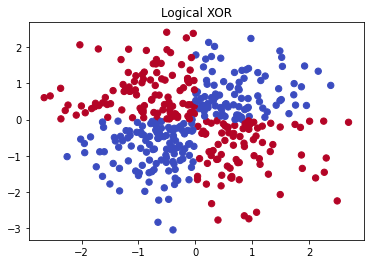

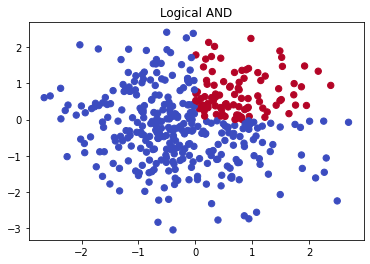

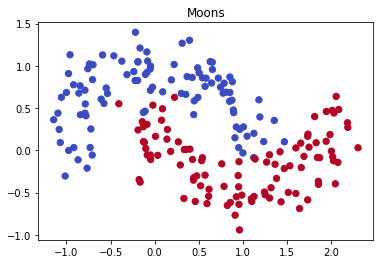

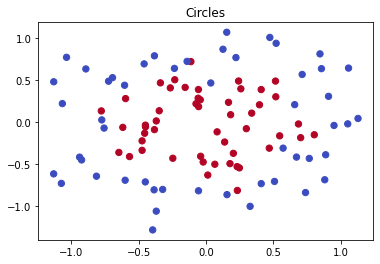

In [3]:
## Generate a dataset and plot it

def XOR_dataCreation():
  ## logical XOR with noise ##

  # NOTE: xx, and yy are not used for the graph
  # np.linspace(-3, 3, 50) return an ndarray from -3 to 3 of 50 evenly spaced samples
  # https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
  l_space = np.linspace(-3, 3, 50)

  # np.meshgrid return ndarray of coordinate matrices from coordinate vectors.
  # For vectors x1, x2,…, ‘xn’ with lengths Ni=len(xi) , return or (N2, N1, N3,...Nn) shaped arrays if indexing=’xy’ 
  # with the elements of xi repeated to fill the matrix along the first dimension for x1, the second for x2 and so on.
  # https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
  xx, yy = np.meshgrid(l_space, l_space)

  # Random seed used to initialize the slow legacy Mersenne Twister pseudo-random number generator or an instantized BitGenerator
  # https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState
  # different from np.random.seed() because calling the RandomState class avoid impacting the global numpy state
  # https://stackoverflow.com/questions/22994423/difference-between-np-random-seed-and-np-random-randomstate
  rng = np.random.RandomState(0)

  # Return a sample (or samples) from the “standard normal” distribution
  # returns an array of shape (400,2) filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1
  # https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
  X = rng.randn(400, 2)

  # numpy.logical_xor compute the truth value of the first column, X[:, 0], XOR the second column, X[:, 1], element-wise
  # positive number are True and 0 and negative numbers are False
  # https://numpy.org/doc/stable/reference/generated/numpy.logical_xor.html
  y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int) 

  return X, y

X,y = XOR_dataCreation()

# Plot the dataset
# plt.cm.coolwarm is a type of color map
# https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.coolwarm)
plt.title('Logical XOR')
plt.show()


## logical AND with noise ##
rng = np.random.RandomState(0)
X = rng.randn(400, 2)
# numpy.logical_and compute the truth value of x1 AND x2 element-wise
# https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html
y = np.logical_and(X[:, 0] > 0, X[:, 1] > 0).astype(int) 

plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.coolwarm)
plt.title('Logical AND')
plt.show()

## Moons Dataset ##
# sklearn.datasets.make_moons make two interleaving half circles. A simple toy dataset to visualize clustering and classification algorithms
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html
X, y = sklearn.datasets.make_moons(200, noise=0.20)

plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.coolwarm)
plt.title('Moons')
plt.show()

## Circles dataset ##
X, y = sklearn.datasets.make_circles(noise=0.2, factor=0.5, random_state=1)

plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.coolwarm)
plt.title('Circles')
plt.show()

## functions for neural network

In [4]:
X,y = XOR_dataCreation()

l_space = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(l_space, l_space)

num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [5]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    ## Predict the function value for the whole gid
    # numpy.c_ translates slice objects to concatenation along the second axis.
    # https://numpy.org/doc/stable/reference/generated/numpy.c_.html
    # numpy.ravel returns a contiguous flattened 1-D array.
    # https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
    # numpy.reshape Gives a new shape to an array without changing its data.
    # https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    # matplotlib.pyplot.contourf draw Plot filled contours
    # https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.contourf.html
    # https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    # numpy.log calculate the natural logarithm in base e, element-wise.
    # https://numpy.org/doc/stable/reference/generated/numpy.log.html
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

# This function learns parameters for the neural network and returns the model.
# this neural network predicts off the dataset, X
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        # a1 is an ndarray of the results from performing the tangent hyperbolic activation function on z1
        # np.tanh compute hyperbolic tangent element-wise https://numpy.org/doc/stable/reference/generated/numpy.tanh.html
        a1 = np.tanh(z1)

        z2 = a1.dot(W2) + b2
        # numpy.exp calculate the exponential of all elements in the input array. e to the x
        # keepdims If this is set to True, the axes which are reduced are left in the result as dimensions with size one. With this option, the result will broadcast correctly against the input array
        # https://numpy.org/doc/stable/reference/generated/numpy.exp.html
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 

        # Backpropagation
        delta3 = probs
        # for delta3, add -1 for the value whose column match those of y via performing advance indexing on ndarray
        # For delta3[range(num_examples), y], range(num_examples) is for the all 400 records. y specify which column to perform operation on
        # https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing
        delta3[range(num_examples), y] -= 1
        # The matrix product of the general chain rule Df(g(t))Dg(t) can then be viewed as a dot product between the gradient vector ∇f(x) and the vector g′(t). We can write the chain rule as h′(t)=∇f(g(t))⋅g′(t).
        # https://mathinsight.org/chain_rule_multivariable_special_cases#:~:text=The%20matrix%20product%20of%20the,%E2%8B%85g%E2%80%B2(t).
        # matrix transpose in gradient descent
        # https://stats.stackexchange.com/questions/335332/why-use-matrix-transpose-in-gradient-descent        
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        # e.g., add to dW2, the product of reg_lambda(the regularization strength) and W2
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        # e.g., add to W1, the product of negative epsilon(learning rate for gradient descent) and dW1
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

## forward and backward propagation example

X.shape:  (400, 2)
W1.shape:  (2, 3)
W2.shape:  (3, 2)
b1.shape:  (1, 3)
b2.shape:  (1, 2)
z1.shape:  (400, 3)

X[:5]
 [[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721]
 [-0.10321885  0.4105985 ]]

W1
 [[-0.34367223 -0.16362751 -0.1742594 ]
 [ 0.54303446 -0.44326024  2.31263918]]

b1
 [[0. 0. 0.]]

z1[0][0] = (X[0][0]*W1[0][0]) + (X[0][1]*W1[1][0]) = (1.764052345967664*-0.3436722340148493) + (0.4001572083672233*0.5430344641808682) = -0.3889566554240358
z1[:5]
 [[-0.38895666 -0.46602127  0.61801653]
 [ 0.88051717 -1.15344732  5.01182313]
 [-1.1725234   0.12760457 -2.58553066]
 [-0.40871119 -0.08836997 -0.51559645]
 [ 0.25844259 -0.16511255  0.96755304]]

a1.shape:  (400, 3)
z2.shape:  (400, 2)
exp_scores.shape:  (400, 2)
probs.shape:  (400, 2)

z1:
 [[-0.38895666 -0.46602127  0.61801653]
 [ 0.88051717 -1.15344732  5.01182313]
 [-1.1725234   0.12760457 -2.58553066]
 [-0.40871119 -0.08836997 -0.51559645]
 [ 0.25844259 -0.16511255  

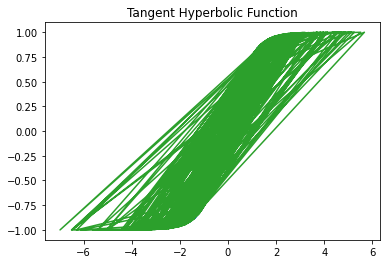

In [6]:
## Forward propagation example

X,y = XOR_dataCreation()

nn_hdim = 3
W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
b1 = np.zeros((1, nn_hdim))
W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
b2 = np.zeros((1, nn_output_dim))

# Forward propagation
z1 = X.dot(W1) + b1

print("X.shape: ", X.shape)
print("W1.shape: ", W1.shape)
print("W2.shape: ", W2.shape)
print("b1.shape: ", b1.shape)
print("b2.shape: ", b2.shape)
print("z1.shape: ", z1.shape)

print("\nX[:5]\n", X[:5])
print("\nW1\n", W1)
print("\nb1\n", b1)

# matrix dot product example
# https://www.studypug.com/algebra-help/multiplying-a-matrix-by-another-matrix#:~:text=The%20dot%20product%20is%20the,column%20of%20the%20second%20matrix.
print(f"\nz1[0][0] = (X[0][0]*W1[0][0]) + (X[0][1]*W1[1][0]) = ({X[0][0]}*{W1[0][0]}) + ({X[0][1]}*{W1[1][0]}) = {(X[0][0]*W1[0][0]) + (X[0][1]*W1[1][0])}")
print("z1[:5]\n", z1[:5])

# a1 is an ndarray of the results from performing the tangent hyperbolic activation function on z1
# np.tanh compute hyperbolic tangent element-wise https://numpy.org/doc/stable/reference/generated/numpy.tanh.html
a1 = np.tanh(z1)
z2 = a1.dot(W2) + b2

# numpy.exp calculate the exponential of all elements in the input array.
# https://numpy.org/doc/stable/reference/generated/numpy.exp.html
exp_scores = np.exp(z2)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

print("\na1.shape: ", a1.shape)
print("z2.shape: ", z2.shape)
print("exp_scores.shape: ", exp_scores.shape)
print("probs.shape: ", probs.shape)
print("\nz1:\n", z1[:5])
print("a1:\n", a1[:5])
print("z2:\n", z2[:5])
print("exp_scores:\n", exp_scores[:5])
print("probs:\n", probs[:5])

plt.plot(z1,a1)
plt.title('Tangent Hyperbolic Function')
plt.show()

In [7]:
# Backpropagation example
X,y = XOR_dataCreation()

probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
delta3 = probs
print("num_examples:", num_examples)
print("delta3.shape:", delta3.shape)
print("y.shape:", y.shape)
print("y[:5]\n", y[:5])

# for delta3, add -1 for the value whose column match those of y via performing advance indexing on ndarray
# For delta3[range(num_examples), y], range(num_examples) is for the all 400 records. y specify which column to perform operation on
# https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing
print("\ndelta3[:5] before\n", delta3[:5])
print("Integer array indexing of delta3[range(num_examples), y][:5]\n", delta3[range(num_examples), y][:5])
delta3[range(num_examples), y] -= 1
print("delta3[:5] after\n", delta3[:5])

# The matrix product of the general chain rule Df(g(t))Dg(t) can then be viewed as a dot product between the gradient vector ∇f(x) and the vector g′(t). We can write the chain rule as h′(t)=∇f(g(t))⋅g′(t).
# https://mathinsight.org/chain_rule_multivariable_special_cases#:~:text=The%20matrix%20product%20of%20the,%E2%8B%85g%E2%80%B2(t).
# matrix transpose in gradient descent
# https://stats.stackexchange.com/questions/335332/why-use-matrix-transpose-in-gradient-descent
dW2 = (a1.T).dot(delta3)
db2 = np.sum(delta3, axis=0, keepdims=True)
delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
dW1 = np.dot(X.T, delta2)
db1 = np.sum(delta2, axis=0)

print("\na1.shape:", a1.shape)
print("a1.T.shape:", a1.T.shape)
print("dW2.shape:", dW2.shape)
print("db2.shape:", db2.shape)
print("W2.T.shape:", W2.T.shape)
print("delta2.shape:", delta2.shape)
print("X.T.shape:", X.T.shape)
print("dW1.shape:", dW1.shape)
print("db1.shape:", db1.shape)

print("\na1[:5]\n", a1[:5])
print("a1.T[:5,:5]\n", a1.T[:5,:5])
print("dW2 = (a1.T).dot(delta3), dW2[:5]\n", dW2[:5])
print("db2 = np.sum(delta3, axis=0, keepdims=True), db2[:5]\n", db2[:5])
print("W2.T[:5]\n", W2.T[:5])
print("delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2)), delta2[:5]\n", delta2[:5])
print("X.T[:5,:5]\n", X.T[:5,:5])
print("1 - np.power(a1[:5], 2)\n", 1 - np.power(a1[:5], 2))
print("dW1 = np.dot(X.T, delta2), dW1[:5]\n", dW1[:5])
print("db1 = np.sum(delta2, axis=0), db1[:5]\n", db1[:5])

num_examples: 400
delta3.shape: (400, 2)
y.shape: (400,)
y[:5]
 [0 0 1 1 1]

delta3[:5] before
 [[0.48564608 0.51435392]
 [0.48605974 0.51394026]
 [0.43122583 0.56877417]
 [0.44926153 0.55073847]
 [0.5400048  0.4599952 ]]
Integer array indexing of delta3[range(num_examples), y][:5]
 [0.48564608 0.48605974 0.56877417 0.55073847 0.4599952 ]
delta3[:5] after
 [[-0.51435392  0.51435392]
 [-0.51394026  0.51394026]
 [ 0.43122583 -0.43122583]
 [ 0.44926153 -0.44926153]
 [ 0.5400048  -0.5400048 ]]

a1.shape: (400, 3)
a1.T.shape: (3, 400)
dW2.shape: (3, 2)
db2.shape: (1, 2)
W2.T.shape: (2, 3)
delta2.shape: (400, 3)
X.T.shape: (2, 400)
dW1.shape: (2, 3)
db1.shape: (3,)

a1[:5]
 [[-0.37046042 -0.43497898  0.54974551]
 [ 0.70667831 -0.81889289  0.99991133]
 [-0.82507943  0.12691646 -0.98870705]
 [-0.38737782 -0.08814065 -0.4742942 ]
 [ 0.25283826 -0.16362829  0.74762702]]
a1.T[:5,:5]
 [[-0.37046042  0.70667831 -0.82507943 -0.38737782  0.25283826]
 [-0.43497898 -0.81889289  0.12691646 -0.08814065 -

In [8]:
# # Calculate loss example

# # commented out to keep consistent lost output
# # Add regularization terms (b1 and b2 don't have regularization terms)
# # e.g., add to dW2, the product of reg_lambda(the regularization strength) and W2
# dW2 += reg_lambda * W2
# dW1 += reg_lambda * W1

# # Gradient descent parameter update
# # e.g., add to W1, the product of negative epsilon(learning rate for gradient descent) and dW1
# W1 += -epsilon * dW1
# b1 += -epsilon * db1
# W2 += -epsilon * dW2
# b2 += -epsilon * db2

# Forward propagation to calculate our predictions
z1 = X.dot(W1) + b1
a1 = np.tanh(z1)
z2 = a1.dot(W2) + b2
exp_scores = np.exp(z2)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

print("b1.shape:", b1.shape)
print("W1.shape:", W1.shape)
print("X.shape:", X.shape)
print("z1.shape:", z1.shape)
print("a1.shape:", a1.shape)
print("b2.shape:", b2.shape)
print("W2.shape:", W2.shape)
print("z2.shape:", z2.shape)
print("exp_scores.shape:", exp_scores.shape)
print("probs.shape:", probs.shape)
print("y.shape:", y.shape)

print("\nb1[:5]\n", b1[:5])
print("W1[:5]\n", W1[:5])
print("X[:5]\n", X[:5])
print("z1 = X.dot(W1) + b1, z1[:5]\n", z1[:5])
print("a1 = np.tanh(z1), a1[:5]\n", a1[:5])
print("b2[:5]\n", b2[:5])
print("W2[:5]\n", W2[:5])
print("z2 = a1.dot(W2) + b2, z2[:5]\n", z2[:5])
print("exp_scores = np.exp(z2), exp_scores[:5]\n", exp_scores[:5])
print("probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True), probs[:5]\n", probs[:5])
print("y[:5]\n:", y[:5])


# Calculating the loss
# numpy.log calculate the natural logarithm in base e, element-wise.
# https://numpy.org/doc/stable/reference/generated/numpy.log.html
corect_logprobs = -np.log(probs[range(num_examples), y])
print("\ncorect_logprobs.shape:", corect_logprobs.shape)
print("corect_logprobs = -np.log(probs[range(num_examples), y]), corect_logprobs[:5]\n", corect_logprobs[:5])

data_loss = np.sum(corect_logprobs)
print("data_loss before addition of regulatization:", data_loss)
# Add regulatization term to loss (optional)
data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
print("data_loss after addition of regulatization:", data_loss)

loss = 1./num_examples * data_loss
print("loss", loss)

b1.shape: (1, 3)
W1.shape: (2, 3)
X.shape: (400, 2)
z1.shape: (400, 3)
a1.shape: (400, 3)
b2.shape: (1, 2)
W2.shape: (3, 2)
z2.shape: (400, 2)
exp_scores.shape: (400, 2)
probs.shape: (400, 2)
y.shape: (400,)

b1[:5]
 [[0. 0. 0.]]
W1[:5]
 [[-0.34367223 -0.16362751 -0.1742594 ]
 [ 0.54303446 -0.44326024  2.31263918]]
X[:5]
 [[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721]
 [-0.10321885  0.4105985 ]]
z1 = X.dot(W1) + b1, z1[:5]
 [[-0.38895666 -0.46602127  0.61801653]
 [ 0.88051717 -1.15344732  5.01182313]
 [-1.1725234   0.12760457 -2.58553066]
 [-0.40871119 -0.08836997 -0.51559645]
 [ 0.25844259 -0.16511255  0.96755304]]
a1 = np.tanh(z1), a1[:5]
 [[-0.37046042 -0.43497898  0.54974551]
 [ 0.70667831 -0.81889289  0.99991133]
 [-0.82507943  0.12691646 -0.98870705]
 [-0.38737782 -0.08814065 -0.4742942 ]
 [ 0.25283826 -0.16362829  0.74762702]]
b2[:5]
 [[0. 0.]]
W2[:5]
 [[-0.17726997 -0.22213485]
 [ 0.00876946 -0.46916623]
 [-0.45483773

Loss after iteration 0: 1.725298
Loss after iteration 1000: 0.019534
Loss after iteration 2000: 0.016562
Loss after iteration 3000: 0.015798
Loss after iteration 4000: 0.015467
Loss after iteration 5000: 0.015275
Loss after iteration 6000: 0.015134
Loss after iteration 7000: 0.015011
Loss after iteration 8000: 0.014910
Loss after iteration 9000: 0.014820
Loss after iteration 10000: 0.014742
Loss after iteration 11000: 0.014681
Loss after iteration 12000: 0.014631
Loss after iteration 13000: 0.014591
Loss after iteration 14000: 0.014557
Loss after iteration 15000: 0.014529
Loss after iteration 16000: 0.014505
Loss after iteration 17000: 0.014486
Loss after iteration 18000: 0.014469
Loss after iteration 19000: 0.014455
x_min -3.159172237996741
x_max 3.1962240525635797
y_min -3.5461430547999266
y_max 2.9124536795437486
xx.shape (646, 636)
yy.shape (646, 636)
xx[:3] [[-3.15917224 -3.14917224 -3.13917224 ...  3.17082776  3.18082776
   3.19082776]
 [-3.15917224 -3.14917224 -3.13917224 ...  3

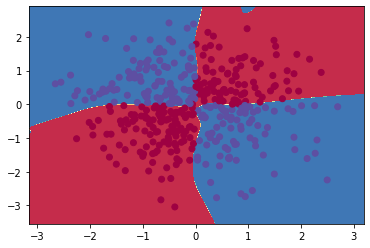

In [9]:
# example of how to plot a decision boundary

model = build_model(20, print_loss=True)
pred_func = lambda x: predict(model, x)

# Set min and max values and give it some padding
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

print("x_min", x_min)
print("x_max", x_max)
print("y_min", y_min)
print("y_max", y_max)
print("xx.shape", xx.shape)
print("yy.shape", yy.shape)
print("xx[:3]", xx[:3])
print("yy[:3]", yy[:3])
print("xx.ravel().shape", xx.ravel().shape)
print("yy.ravel().shape", yy.ravel().shape)
print("xx.ravel()", xx.ravel())
print("yy.ravel()", yy.ravel())
print("np.c_[xx.ravel(), yy.ravel()][:5]\n", np.c_[xx.ravel(), yy.ravel()][:5])

## Predict the function value for the whole gid
# numpy.c_ translates slice objects to concatenation along the second axis.
# https://numpy.org/doc/stable/reference/generated/numpy.c_.html
# numpy.ravel returns a contiguous flattened 1-D array.
# https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
# numpy.reshape Gives a new shape to an array without changing its data.
# https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
# Forward propagation
x = np.c_[xx.ravel(), yy.ravel()]
z1 = x.dot(W1) + b1
a1 = np.tanh(z1)
z2 = a1.dot(W2) + b2
exp_scores = np.exp(z2)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
print("\nprobs.shape", probs.shape)
print("probs[:5]\n", probs[:5])
# np.argmax return for each record in probs ndarray, the index of the highest values so for  [9.999 7.861], the index of 0 is return
# numpy.argmax returns the indices of the maximum values along an axis.
# https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
print("\nnp.argmax(probs, axis=1)[:400]\n", np.argmax(probs, axis=1)[:400])

Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
print("Z.shape before reshape", Z.shape)
print("Z[:400] before reshape\n", Z[:400])
Z = Z.reshape(xx.shape)
print("Z.shape after reshape", Z.shape)
print("Z[:5] after reshape\n", Z[:5])

# Plot the contour and training examples
# matplotlib.pyplot.contourf draw Plot filled contours.
# xx and yy are the coordinates. Z is the height values
# https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.contourf.html
# https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

## Build the model

Loss after iteration 0: 0.757321
Loss after iteration 1000: 0.430950
Loss after iteration 2000: 0.430943
Loss after iteration 3000: 0.430942
Loss after iteration 4000: 0.430941
Loss after iteration 5000: 0.430941
Loss after iteration 6000: 0.430940
Loss after iteration 7000: 0.430940
Loss after iteration 8000: 0.430940
Loss after iteration 9000: 0.430940
Loss after iteration 10000: 0.430939
Loss after iteration 11000: 0.430939
Loss after iteration 12000: 0.430939
Loss after iteration 13000: 0.430939
Loss after iteration 14000: 0.430939
Loss after iteration 15000: 0.430939
Loss after iteration 16000: 0.430939
Loss after iteration 17000: 0.430939
Loss after iteration 18000: 0.430939
Loss after iteration 19000: 0.430939


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

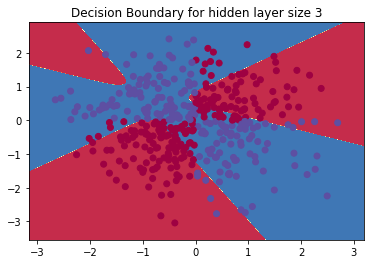

In [10]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

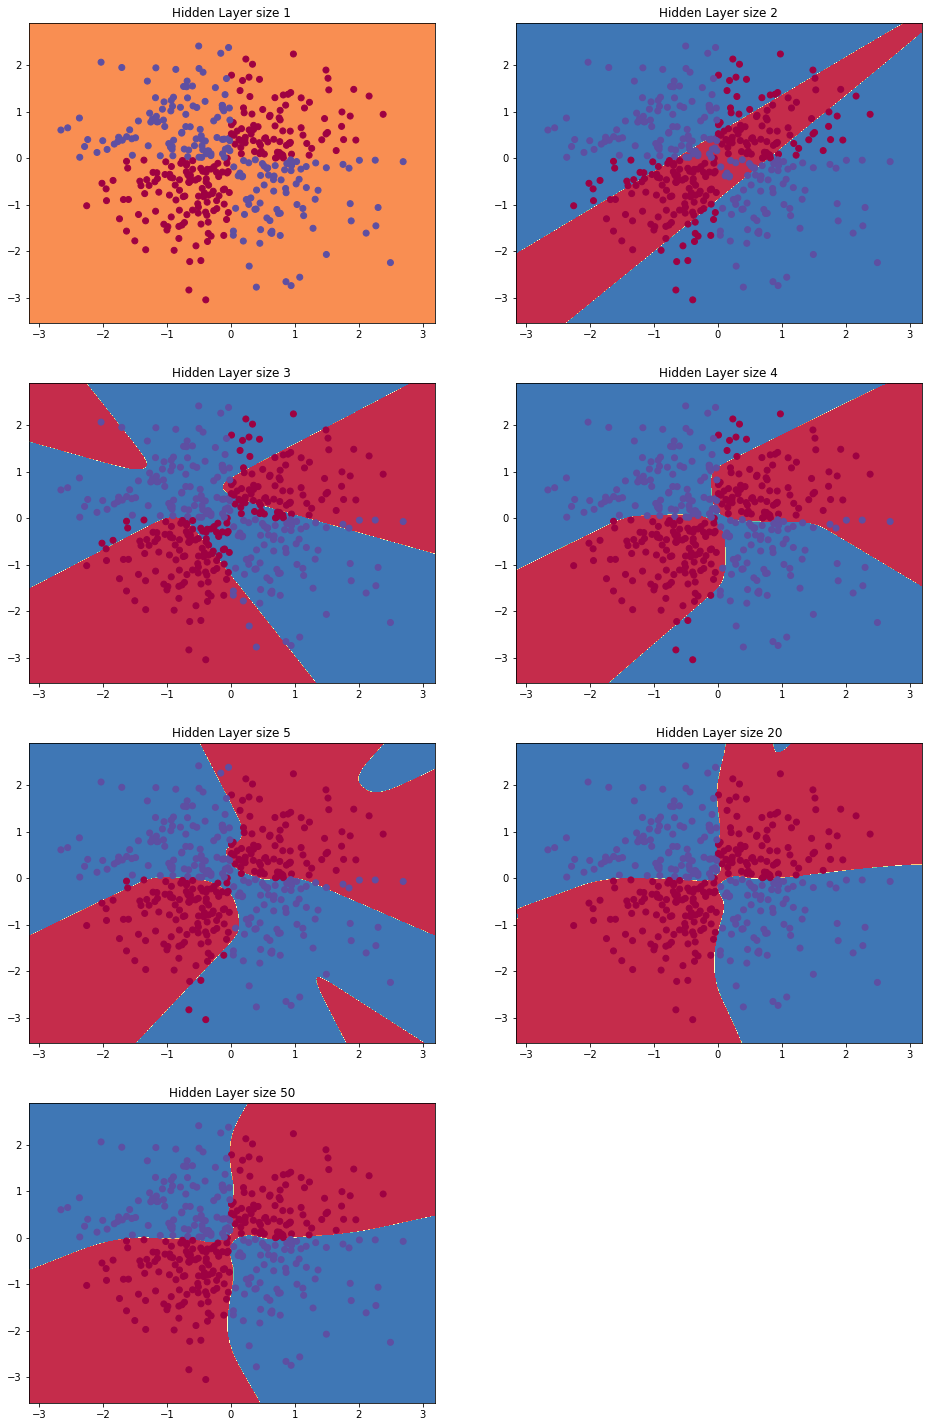

In [11]:
# Experiment with the hidden layer sizef
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

# 2. Spoken Digit Dataset
Spoken digits classification and generation.
Original dataset can be found here: https://github.com/Jakobovski/free-spoken-digit-dataset

In [12]:
import torch
import torchvision
from torch.utils import data
import torchaudio
from torch.utils.data.sampler import SubsetRandomSampler

import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets, transforms
from torchvision.utils import make_grid , save_image
import os
import re
# The concurrent.futures module provides a high-level interface for asynchronously executing callables, e.g., Launching parallel tasks
# https://docs.python.org/3/library/concurrent.futures.html
import concurrent

import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import copy
import itertools
import pandas as pd
import librosa
import librosa.display

import IPython.display as ipd
from tqdm.notebook import tqdm
from tqdm import *
import soundfile as sf

### Download FSDD from Github

In [13]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset.git

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 4234, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 4234 (delta 12), reused 8 (delta 8), pack-reused 4212
Receiving objects: 100% (4234/4234), 30.37 MiB | 13.61 MiB/s, done.
Resolving deltas: 100% (116/116), done.


### Inspect the data downloaded

In [14]:
def plotRawWave(plotTitle, sampleRate, samples, figWidth=14, figHeight=4):
    # matplotlib.pyplot.figure create a new figure, or activate an existing figure
    # figsize is Width, height in inches
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
    plt.figure(figsize=(figWidth, figHeight))
    plt.plot(samples)
    plt.title("Raw sound wave of " + plotTitle)
    plt.ylabel("Amplitude")
    plt.xlabel("Time [sec]")
    plt.show()  # force display while in for loop
    return None

def computeLogSpectrogram(audio, sampleRate, windowSize=20, stepSize=10, epsilon=1e-10):
    nperseg  = int(round(windowSize * sampleRate / 1000))
    noverlap = int(round(stepSize   * sampleRate / 1000))
    freqs, times, spec = signal.spectrogram(audio,
                                            fs=sampleRate,
                                            window='ham',
                                            nperseg=nperseg,
                                            noverlap=noverlap,
                                            detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + epsilon)

def plotSpectrogram(plotTitle, freqs, times, spectrogram, figWidth=14, figHeight=4):
    fig = plt.figure(figsize=(figWidth, figHeight))
    plt.imshow(spectrogram.T, aspect='auto', origin='lower', 
               cmap="jet",   #  default was "viridis"  (perceptually uniform)
               extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    plt.colorbar(pad=0.01)
    plt.title('Spectrogram of ' + plotTitle)
    plt.ylabel("Frequency [Hz]")
    plt.xlabel("Time [sec]")
    fig.tight_layout()
    plt.show()  # force display while in for loop
    return None

def computeMelSpectrogram(samples, sampleRate, nMels=128):
    # librosa.feature.melspectrogram compute a mel-scaled spectrogram
    # https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html
    # Can additionally pass Mel filter bank parameters. n_mels is the number of Mel bands to generate
    # https://librosa.org/doc/main/generated/librosa.filters.mel.html
    melSpectrum = librosa.feature.melspectrogram(samples.astype(np.float16), sr=sampleRate, n_mels=nMels)
    
    return melSpectrum

def computeLogMelSpectrogram(samples, sampleRate, nMels=128):
    melSpectrum = librosa.feature.melspectrogram(samples.astype(np.float16), sr=sampleRate, n_mels=128)
    
    # Convert to dB, which is a log scale.  Use peak power as reference.
    # librosa.power_to_db convert a power spectrogram (amplitude squared) to decibel (dB) units. This computes the scaling, 10 * log10(S / ref), in a numerically stable way.
    # https://librosa.org/doc/main/generated/librosa.power_to_db.html
    # numpy.ndarray.max Return the maximum along a given axis. 
    # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html
    logMelSpectrogram = librosa.power_to_db(melSpectrum, ref=np.max)
    
    return logMelSpectrogram

def plotMelSpectrogram(plotTitle, sampleRate, melSpectrum, figWidth=14, figHeight=4):
    fig = plt.figure(figsize=(figWidth, figHeight))
    librosa.display.specshow(melSpectrum, sr=sampleRate, x_axis='time', y_axis='mel', cmap="jet")
    plt.title('Mel frequency spectrogram: ' + plotTitle)
    plt.colorbar(pad=0.01, format='%+02.0f dB')
    plt.tight_layout()  
    plt.show()  # force display while in for loop
    return None

def plotLogMelSpectrogram(plotTitle, sampleRate, logMelSpectrum, figWidth=14, figHeight=4):
    fig = plt.figure(figsize=(figWidth, figHeight))
    # librosa.display.specshow display a spectrogram/chromagram/cqt/etc.
    # the mel scale for the y-axis is for frequencies 
    # the cmap=jet is a colormap, https://matplotlib.org/stable/tutorials/colors/colormaps.html#miscellaneous
    # https://librosa.org/doc/main/generated/librosa.display.specshow.html
    librosa.display.specshow(logMelSpectrum, sr=sampleRate, x_axis='time', y_axis='mel', cmap="jet")
    plt.title('Mel log-frequency power spectrogram: ' + plotTitle)
    # matplotlib.pyplot.colorbar add a colorbar to a plot
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
    plt.colorbar(pad=0.01, format='%+02.0f dB')
    # matplotlib.pyplot.tight_layout adjust the padding between and around subplots
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
    plt.tight_layout()  
    plt.show()  # force display while in for loop
    return None

def computeMFCC(samples, sampleRate, nFFT=512, hopLength=256, nMFCC=40, norm=None):
    mfcc = librosa.feature.mfcc(y=samples.astype(np.float16), sr=sampleRate, 
                                n_fft=nFFT, hop_length=hopLength, n_mfcc=nMFCC,
                                norm=norm)
    
    # Let's add on the first and second deltas 
    mfcc = librosa.feature.delta(mfcc, order=2)
    return mfcc

def plotMFCC(plotTitle, sampleRate, mfcc, figWidth=14, figHeight=4):
    mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
    fig = plt.figure(figsize=(figWidth, figHeight))
    librosa.display.specshow(mfcc, sr=sampleRate, x_axis='time',cmap="jet")
    plt.colorbar(pad=0.01)
    plt.title("Mel-frequency cepstral coefficients (MFCC): " + plotTitle)
    plt.tight_layout()
    plt.show()  # force display while in for loop
    return None

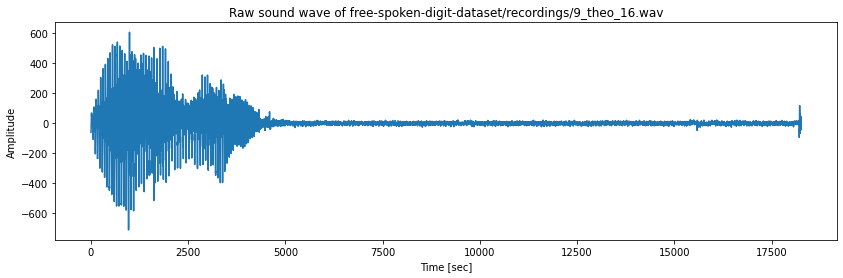

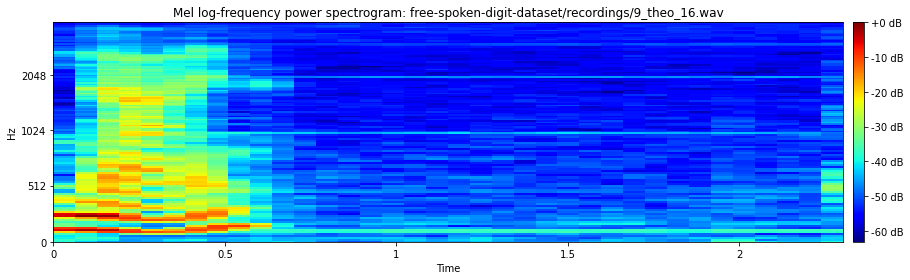

In [15]:
def showWavefile(filename):
    # scipy.io.wavfile.read return the sample rate (in samples/sec) and data (ndarray) from an LPCM WAV file
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html
    sampleRate, samples = wavfile.read(filename)  
    plotRawWave(filename, sampleRate, samples)
    
    melSpectrogram = computeMelSpectrogram(samples, sampleRate)
    
    logMelSpectrogram = computeLogMelSpectrogram(samples, sampleRate)
    plotLogMelSpectrogram(filename, sampleRate, logMelSpectrogram)
    
    return sampleRate, samples, logMelSpectrogram

# Sample a file from the dataset
# for this file, the shape of the data returned from wavfile.read() is (18262,)
filename = 'free-spoken-digit-dataset/recordings/9_theo_16.wav'

# Public API for display tools in IPython. Create a widget to play the audio file
# https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html
ipd.display( ipd.Audio(filename) )

# graph the audio file
sampleRate, samples, logMelSpectrogram = showWavefile(filename)

## Increase the amount of data: Data Augmentation
The original dataset contains 1,500 examples (it has since grown to 2,000 at the time of this writing). We can create additional examples by augmenting the original files. Here we apply time stretching and pitch shifting to increase the number of examples. 

This has already been computed for convenience, so it is left commented out here. 

In [16]:
# Load Wav File Paths
original_wavfiles=[]

root='free-spoken-digit-dataset/recordings/'
# Python method walk() generates the file names in a directory tree by walking the tree either top-down or bottom-up.
# https://www.tutorialspoint.com/python/os_walk.htm
for path, dirs, files in os.walk(root, topdown=True):
    for file in files:
        if file.endswith('.wav'):
            # os.path.join() method in Python join one or more path components intelligently. 
            # This method concatenates various path components with exactly one directory separator (‘/’) following each non-empty part except the last path component
            # https://www.geeksforgeeks.org/python-os-path-join-method/
            original_wavfiles.append(os.path.join(path, file))
print("Number of wavfiles: ", len(original_wavfiles))

Number of wavfiles:  3000


In [17]:
augmented_dir = './data/wav/'
# os.makedirs() create a directory recursively
# for exist_ok=True, True leaves directory unaltered
# https://www.geeksforgeeks.org/python-os-makedirs-method/
os.makedirs(augmented_dir, exist_ok=True)
default_sample_rate = 8000 # Reducing everything to 8kHz phone quality for efficiency

# Create Augmented examples
# tqdm is a Fast, Extensible Progress Bar for Python
# https://github.com/tqdm/tqdm
for file_path in tqdm(original_wavfiles):
    # librosa.load Load an audio file as a floating point time series and returns the audio time series, y, and the sampling rate of y
    # https://librosa.org/doc/main/generated/librosa.load.html
    y, Fs = librosa.load(file_path) 
    for ts in [0.75,1,1.25]:
        for ps in [-1,0,+1]: 
            # librosa.effects.time_stretch Time-stretch an audio series by a fixed rate
            # https://librosa.org/doc/main/generated/librosa.effects.time_stretch.html
            y_new = librosa.effects.time_stretch(y, ts)
            # librosa.effects.pitch_shift Shift the pitch of a waveform by n_steps steps.
            # https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html
            y_new = librosa.effects.pitch_shift(y_new, Fs, n_steps=ps)
            # os.path.basename() method returns the tail part after splitting the specified path into (head, tail) pair
            # https://www.geeksforgeeks.org/python-os-path-basename-method/

            # https://www.geeksforgeeks.org/python-os-path-splitext-method/
            basename = '_'.join([os.path.splitext(os.path.basename(file_path))[0],str(ts),str(ps)])+'.wav'
            output_file = os.path.join(augmented_dir, basename)

            # soundfile.write Write data to a sound file.
            # https://pysoundfile.readthedocs.io/en/latest/#soundfile.write
            sf.write(output_file, y_new, default_sample_rate)

100%|██████████| 3000/3000 [18:03<00:00,  2.77it/s]


In [18]:
# example of an output file name
print("file_path:", file_path)
print("os.path.basename(file_path):", os.path.basename(file_path))
print("os.path.splitext(os.path.basename(file_path)):", os.path.splitext(os.path.basename(file_path)))
print("ts:", ts)
print("ps:", ps)
print("basename:", basename)

file_path: free-spoken-digit-dataset/recordings/7_yweweler_31.wav
os.path.basename(file_path): 7_yweweler_31.wav
os.path.splitext(os.path.basename(file_path)): ('7_yweweler_31', '.wav')
ts: 1.25
ps: 1
basename: 7_yweweler_31_1.25_1.wav


In [19]:
augmented_wavfiles=[]

root='./data/wav/'
for path, dirs, files in os.walk(root, topdown=True):
    for file in files:
        if file.endswith('.wav'):
            augmented_wavfiles.append(os.path.join(path, file))
print("Number of wavfiles: ", len(augmented_wavfiles))

Number of wavfiles:  27000


Note: Loading audio and performing the FFT to convert it to the frequence spectrum requires repetative computation. We can save time on this conversion by computing it once and saving the features in numpy arrays, which will be much faster during loading. Furthermore, even doing this process once can take a significant amount of time, so we parallelize the process here. 

To simplify the network architecture, we fix the size of all examples in the dataset to 1.5s and save them if we need to inspect them. 

In [20]:
def trim_files(file_path, output_dir, max_length):
    samples, Fs = librosa.load(file_path)
    # librosa.util.fix_length Fix the length an array data to exactly size along a target axis.
    # https://librosa.org/doc/main/generated/librosa.util.fix_length.html
    short_samples = librosa.util.fix_length(samples, 12000)# int(max_length * Fs))

    basename = os.path.basename(file_path)
    output_file = os.path.join(output_dir, basename)
    sf.write(output_file, short_samples, Fs)

In [21]:
# The ProcessPoolExecutor class is an Executor subclass that executes calls asynchronously using a pool of at most max_workers processes
# https://docs.python.org/3/library/concurrent.futures.html#processpoolexecutor
executor = concurrent.futures.ProcessPoolExecutor(10)

trimmed_dir = './data/trimmed_wav/'
max_length = 1.5  # Maximum length in seconds
os.makedirs(trimmed_dir, exist_ok=True)

# submit Schedules the callable, fn (function), to be executed as fn(*args, **kwargs) and returns a Future object representing the execution of the callable.
# https://docs.python.org/3/library/concurrent.futures.html#concurrent.futures.Executor.submit
futures = [executor.submit(trim_files, file_path, trimmed_dir, max_length) for file_path in augmented_wavfiles]

# concurrent.futures.wait Wait for the Future instances (possibly created by different Executor instances) given by fs to complete. 
# Duplicate futures given to fs are removed and will be returned only once. Returns a named 2-tuple of sets. 
# The first set, named done, contains the futures that completed (finished or cancelled futures) before the wait completed. 
# The second set, named not_done, contains the futures that did not complete (pending or running futures).
concurrent.futures.wait(futures)

DoneAndNotDoneFutures(done={<Future at 0x7f9b46400050 state=finished returned NoneType>, <Future at 0x7f9b46e00090 state=finished returned NoneType>, <Future at 0x7f9b478000d0 state=finished returned NoneType>, <Future at 0x7f9b454000d0 state=finished returned NoneType>, <Future at 0x7f9b46400110 state=finished returned NoneType>, <Future at 0x7f9b46e00150 state=finished returned NoneType>, <Future at 0x7f9b47800190 state=finished returned NoneType>, <Future at 0x7f9b45400190 state=finished returned NoneType>, <Future at 0x7f9b46e00210 state=finished returned NoneType>, <Future at 0x7f9b46400210 state=finished returned NoneType>, <Future at 0x7f9b47800250 state=finished returned NoneType>, <Future at 0x7f9b45400250 state=finished returned NoneType>, <Future at 0x7f9b46400290 state=finished returned NoneType>, <Future at 0x7f9b46e002d0 state=finished returned NoneType>, <Future at 0x7f9b47800310 state=finished returned NoneType>, <Future at 0x7f9b45400310 state=finished returned NoneTyp

In [22]:
trimmed_wavfiles=[]

root='./data/trimmed_wav/'
for path, dirs, files in os.walk(root, topdown=True):
    for file in files:
        if file.endswith('.wav'):
            trimmed_wavfiles.append(os.path.join(path, file))
print("Number of wavfiles: ", len(trimmed_wavfiles))

Number of wavfiles:  27000


Save features as numpy arrays for faster loading.

In [23]:
def cache_spectrogram_features(file_path, output_dir):
    samples, Fs = librosa.load(file_path) 

    melSpectrum = librosa.feature.melspectrogram(samples.astype(np.float16), sr=Fs, n_mels=40)
    
    # Convert to dB, which is a log scale.  Use peak power as reference.
    logMelSpectrogram = librosa.power_to_db(melSpectrum, ref=np.max)
    basename = os.path.splitext(os.path.basename(file_path))[0]+'.npy'
    output_file = os.path.join(output_dir, basename)

    # numpy.save save an array to a binary file in NumPy .npy format.
    # https://numpy.org/doc/stable/reference/generated/numpy.save.html
    np.save(output_file, logMelSpectrogram)

In [24]:
executor = concurrent.futures.ProcessPoolExecutor(10)

feature_dir = './data/npy/'
os.makedirs(feature_dir, exist_ok=True)
futures = [executor.submit(cache_spectrogram_features, file_path, feature_dir) for file_path in trimmed_wavfiles]
concurrent.futures.wait(futures)

DoneAndNotDoneFutures(done={<Future at 0x7f9b464000d0 state=finished returned NoneType>, <Future at 0x7f9b454002d0 state=finished returned NoneType>, <Future at 0x7f9b46e00350 state=finished returned NoneType>, <Future at 0x7f9b47800390 state=finished returned NoneType>, <Future at 0x7f9b46e00410 state=finished returned NoneType>, <Future at 0x7f9b47800450 state=finished returned NoneType>, <Future at 0x7f9b46e004d0 state=finished returned NoneType>, <Future at 0x7f9b45400510 state=finished returned NoneType>, <Future at 0x7f9b478005d0 state=finished returned NoneType>, <Future at 0x7f9b45400690 state=finished returned NoneType>, <Future at 0x7f9b464006d0 state=finished returned NoneType>, <Future at 0x7f9b45400750 state=finished returned NoneType>, <Future at 0x7f9b46400750 state=finished returned NoneType>, <Future at 0x7f9b47800750 state=finished returned NoneType>, <Future at 0x7f9b464007d0 state=finished returned NoneType>, <Future at 0x7f9b47800810 state=finished returned NoneTyp

In [25]:
npyfiles=[]

root='data/npy/'
for path, dirs, files in os.walk(root, topdown=True):
    for file in files:
        if file.endswith('.npy'):
            npyfiles.append(os.path.join(path, file))
print("Number of npy files: ", len(npyfiles))

Number of npy files:  27000


### Creat audio dataset splits and data loaders

In [26]:
# torch.utils.data.Dataset is an abstract class representing a Dataset.
# https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset
class AudioDataset(data.Dataset):
    'Characterizes a dataset for PyTorch'
    # The __init__ method lets the class initialize the object’s attributes 
    # https://www.geeksforgeeks.org/__init__-in-python/
    def __init__(self, filenames, labels, sr=8000):
        'Initialization'
        # self represents the instance of the class. By using the “self”  we can access the attributes and methods of the class in python. 
        # It binds the attributes with the given arguments.
        # https://www.geeksforgeeks.org/self-in-python-class/
        self.labels = labels
        self.filenames = filenames
        self.sr = sr

    # The Python __len__ method returns a positive integer that represents the length of the object on which it is called
    # https://blog.finxter.com/python-__len__-magic-method/
    def __len__(self):
        'Denotes the total number of samples'
        return len(self.filenames)

    # __getitem__() is a magic method in Python, which when used in a class, allows its instances to use the [] (indexer) operators
    # https://www.geeksforgeeks.org/__getitem__-in-python/
    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        filename = self.filenames[index]
        # Load data and get label
        # numpy.load Load arrays or pickled objects from .npy, .npz or pickled files
        # https://numpy.org/doc/stable/reference/generated/numpy.load.html
        # A torch.Tensor is a multi-dimensional matrix containing elements of a single data type
        # https://pytorch.org/docs/stable/tensors.html
        X = (torch.Tensor(np.load(filename))+80)/80  # 0 centered [-1,1]

        y = self.labels[int(os.path.basename(filename)[0])]  # First character in filename is class
        return X, y
    
    # pad_data is not used in this this notebook
    def pad_data(self, s):
        # numpy.zeros Return a new array of given shape and type, filled with zeros
        # https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
        padded = np.zeros((self.__len__(),), dtype=np.int64)

        # if length of s is more than length of self then assign values of padded to self values. If not, assign padded's values to s's values
        # https://numpy.org/doc/stable/user/basics.indexing.html#assigning-values-to-indexed-arrays
        if len(s) > self.__len__(): padded[:] = s[:self.__len__()]
        else: padded[:len(s)] = s
        return padded

# create audio_dataset
audio_dataset = AudioDataset(npyfiles, list(range(10)))

In [27]:
# example of what pad_data would do
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
s = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
padded = np.zeros(10, dtype=np.int64)

print("padded before:", padded)

# if length of s is more than length of a then assign values of padded to a's values. If not, assign padded's values to s's values
# https://numpy.org/doc/stable/user/basics.indexing.html#assigning-values-to-indexed-arrays
if len(s) > len(a): padded[:] = s[:len(a)]
else: padded[:len(s)] = s

print("padded after:", padded)

padded before: [0 0 0 0 0 0 0 0 0 0]
padded after: [1 2 3 4 5 6 7 8 9 0]


In [28]:
validation_split = .1
testing_split = 0.1
shuffle_dataset = True
random_seed= 1

# Creating data indices for training and validation splits:
dataset_size = len(audio_dataset)
indices = list(range(dataset_size))

if shuffle_dataset :
    np.random.seed(random_seed)
    # numpy.random.shuffle Modify a sequence in-place by shuffling its contents.
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html
    np.random.shuffle(indices)

In [29]:
train_indices = indices[:int(-dataset_size*(validation_split+testing_split))]
val_indices = indices[int(-dataset_size*(validation_split+testing_split)):int(-dataset_size*testing_split)]
test_indices = indices[int(-dataset_size*testing_split):]

print("int(-dataset_size*(validation_split+testing_split)):", int(-dataset_size*(validation_split+testing_split)))
print("int(-dataset_size*testing_split):", int(-dataset_size*testing_split))
print("int(-dataset_size*testing_split):", int(-dataset_size*testing_split))

# # Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)
test_sampler = SubsetRandomSampler(test_indices)

print('\nTraining examples: ' + str(len(train_sampler)))
print('Validation examples: ' + str(len(val_sampler)))
print('Testing examples: ' + str(len(test_sampler)))

int(-dataset_size*(validation_split+testing_split)): -5400
int(-dataset_size*testing_split): -2700
int(-dataset_size*testing_split): -2700

Training examples: 21600
Validation examples: 2700
Testing examples: 2700


## Exploratory Data Analysis

In [30]:
# Create DataLoaders

## argument for torch.utils.data.DataLoader
# https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader
# batch_size = how many samples per batch to load (default: 1).
# num_workers = how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process
# pin_memory = If True, the data loader will copy Tensors into CUDA pinned memory before returning them
dataloader_args = dict(batch_size=32, num_workers=8, pin_memory=False)

# torch.utils.data.DataLoader is a Data loader. Combines a dataset and a sampler, and provides an iterable over the given dataset.
# sampler = defines the strategy to draw samples from the dataset. Can be any Iterable with __len__ implemented. If specified, shuffle must not be specified
train_loader = torch.utils.data.DataLoader(audio_dataset, **dataloader_args, sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(audio_dataset, **dataloader_args, sampler=val_sampler)
test_loader = torch.utils.data.DataLoader(audio_dataset, **dataloader_args, sampler=test_sampler)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


#### 1. Let's look at a sample of our data to make sure that it looks reasonable. 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


X[0][0]
  tensor([0.5065, 0.5069, 0.5073, 0.5086, 0.5096, 0.5097, 0.5094, 0.5095, 0.5101,
        0.5111, 0.5118, 0.5121, 0.5121, 0.5119, 0.5116, 0.5119, 0.5122, 0.5125,
        0.5124, 0.5123, 0.5121, 0.5119, 0.5118, 0.5118])
y[0]
  tensor(6)

X.shape: torch.Size([32, 40, 24])
X.unsqueeze(1).shape: torch.Size([32, 1, 40, 24]) 



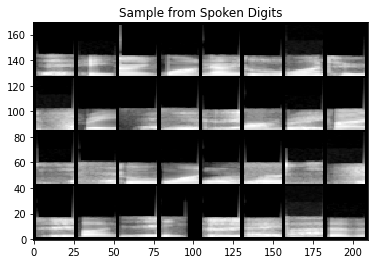

In [31]:
def imshow(img, title=''):
    img = img # unnormalize
    # .numpy() return a copy of the contents of this Tensor into a NumPy array or scalar
    # https://github.com/tensorflow/tensorflow/blob/c256c071bb26e1e13b4666d1b3e229e110bc914a/tensorflow/python/framework/ops.py#L1126-L1138
    npimg = img.numpy()
    #c was not defined originally in this notebook
    c = 0
    plt.title(title) if title is not None else plt.title(str(c).zfill(3))
    # matplotlib.pyplot.imshow Display data as an image, i.e., on a 2D regular raster.
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
    plt.imshow(np.transpose(npimg, (1,2,0)),interpolation='nearest', aspect='auto',origin='lower')

# The Python iter() function returns an iterator for the given object, which can be iterated one element at a time.
# https://www.programiz.com/python-programming/methods/built-in/iter
# The next() function returns the next item from the iterator.
# https://www.programiz.com/python-programming/methods/built-in/next
dataiter = iter(train_loader)
# type(X) and type(y) is a torch.Tensor
X, y = dataiter.next()
X = (X+40)/80
print("X[0][0]\n ",  X[0][0])
print("y[0]\n ",  y[0])

# TORCH.TENSOR.EXPAND_AS Expand this tensor to the same size as other
# https://pytorch.org/docs/stable/generated/torch.Tensor.expand_as.html
# X = X / torch.Tensor([40]).expand_as(X)

# TORCH.TENSOR.UNSQUEEZE Returns a new tensor with a dimension of size one inserted at the specified position.
# https://pytorch.org/docs/stable/generated/torch.Tensor.unsqueeze.html
print("\nX.shape:", X.shape)
print("X.unsqueeze(1).shape:", X.unsqueeze(1).shape, "\n")

# unsqueeze X to use in make_grid
# torchvision.utils.make_grid Make a grid of images (a tensor). Requires 4D mini-batch Tensor of shape (B x C x H x W) 
# https://pytorch.org/vision/stable/generated/torchvision.utils.make_grid.html
grid_img = torchvision.utils.make_grid(X.unsqueeze(1), normalize=True)
imshow(grid_img, title='Sample from Spoken Digits')

#### 2. Let's examine the balance between the classes.

In [32]:
def get_labels(loader):
    # numpy.asarray Convert the input to an array.
    # https://numpy.org/doc/stable/reference/generated/numpy.asarray.html
    return np.asarray([label for batch in loader for label in batch[1]])

train_labels = get_labels(train_loader)
val_labels = get_labels(val_loader)
test_labels = get_labels(test_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [33]:
# Example of np.diff and np.unique
# numpy.unique Returns the sorted unique elements of an array
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
unique = np.unique(train_labels)
print("train_labels\n", train_labels)
print("unique = np.unique(train_labels)\n", unique)
print("len(train_labels):", len(train_labels))
print("len(unique):", len(unique) )

# numpy.diff Calculate the n-th discrete difference along the given axis.
# for [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] as an example, numpy.diff returns [1. 1. 1. 1. 1. 1. 1. 1. 1.] because the function performs
# 1-0, 2-1, 3-2, 4-3, 5-4, 6-5, 7-6, 8-7, 9-8
# https://numpy.org/doc/stable/reference/generated/numpy.diff.html
diff = np.diff(unique)
print("diff = np.diff(unique)\n", diff)
print("len(diff):", len(diff) )

d = diff.min()
print("d = diff.min():", d)

left_of_first_bin = d - float(d)/2
right_of_last_bin = d + float(d)/2
print("np.arange(left_of_first_bin, right_of_last_bin + d, d)\n", np.arange(left_of_first_bin, right_of_last_bin + d, d))

train_labels
 [9 5 9 ... 7 2 0]
unique = np.unique(train_labels)
 [0 1 2 3 4 5 6 7 8 9]
len(train_labels): 21600
len(unique): 10
diff = np.diff(unique)
 [1 1 1 1 1 1 1 1 1]
len(diff): 9
d = diff.min(): 1
np.arange(left_of_first_bin, right_of_last_bin + d, d)
 [0.5 1.5]


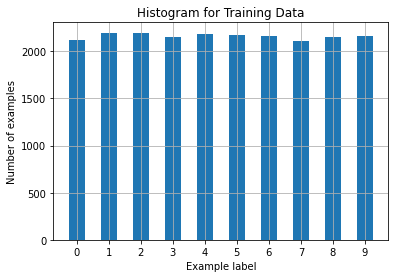

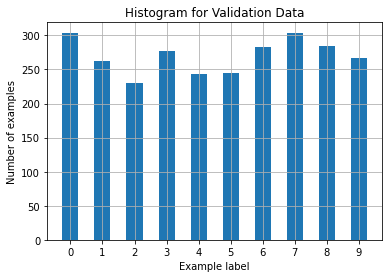

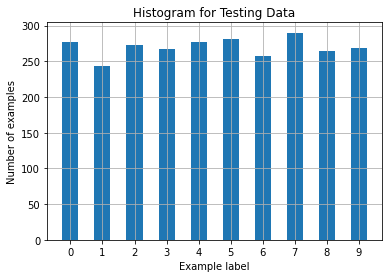

In [34]:
def show_hist(data, title):
    # numpy.unique Returns the sorted unique elements of an array
    # https://numpy.org/doc/stable/reference/generated/numpy.unique.html
    # numpy.diff Calculate the n-th discrete difference along the given axis.
    # https://numpy.org/doc/stable/reference/generated/numpy.diff.html
    d = np.diff(np.unique(data)).min()
    left_of_first_bin = data.min() - float(d)/2
    right_of_last_bin = data.max() + float(d)/2
    # matplotlib.pyplot.hist Plot a histogram.
    # second arguement is for bins. If bins is a sequence, gives bin edges, including left edge of first bin and right edge of last bin. In this case, bins is returned unmodified.
    # np.arange(left_of_first_bin, right_of_last_bin + d, d), for bins help center the bin the number mark
    # rwidth is the The relative width of the bars as a fraction of the bin width
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
    plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.5)
    # matplotlib.pyplot.grid Configure the grid lines. True  show the grid lines
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    plt.grid(True)
    # matplotlib.pyplot.xticks Get or set the current tick locations and labels of the x-axis
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
    plt.xticks(range(0, 10))
    plt.title(title)
    plt.ylabel("Number of examples")
    plt.xlabel("Example label")
    plt.show()

show_hist(train_labels, "Histogram for Training Data")
show_hist(val_labels, "Histogram for Validation Data")
show_hist(test_labels, "Histogram for Testing Data")

## Supervised classifer example

In [35]:
net = torch.nn.Linear(2,2);

print('n2etwork structure : torch.nn.Linear(2,2) :\n',net)

print('Weight of network :\n',net.weight)

print('Bias of network :\n',net.bias)

x = torch.tensor([[1.0,1.0]])

print("input = x :\n ",x)

print('net.forward(x) :\n',net.forward(x))

# TORCH.MM Performs a matrix multiplication of the matrices input and mat2.
# https://pytorch.org/docs/stable/generated/torch.mm.html
o = torch.mm(net.weight,x.t()) + net.bias.view(2,1);

print('wx.T + b :\n',o)

n2etwork structure : torch.nn.Linear(2,2) :
 Linear(in_features=2, out_features=2, bias=True)
Weight of network :
 Parameter containing:
tensor([[-0.5606,  0.0154],
        [ 0.2907, -0.4289]], requires_grad=True)
Bias of network :
 Parameter containing:
tensor([-0.6001, -0.3931], requires_grad=True)
input = x :
  tensor([[1., 1.]])
net.forward(x) :
 tensor([[-1.1453, -0.5313]], grad_fn=<AddmmBackward0>)
wx.T + b :
 tensor([[-1.1453],
        [-0.5313]], grad_fn=<AddBackward0>)


In [36]:
## example of training the model for one epoch

# Define model architecture in pytorch
# torch.nn.Module is a Base class for all neural network modules
# https://pytorch.org/docs/stable/generated/torch.nn.Module.html
 # https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
class Model(nn.Module):
    def __init__(self, input_size):
        # The super() builtin returns a proxy object (temporary object of the superclass) that allows us to access methods of the base class.
        # https://www.programiz.com/python-programming/methods/built-in/str
        super(Model, self).__init__()
        self.input_size = input_size
        
        ### hidder layer 1
        # torch.nn.Linear Applies a linear transformation to the incoming data: y = xA^T + b
        # https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
        # https://www.sharetechnote.com/html/Python_PyTorch_nn_Linear_01.html
        self.fc1 = nn.Linear(self.input_size, 128)
        # torch.nn.BatchNorm1d Applies Batch Normalization over a 2D or 3D input as described in the paper 
        # Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift
        # https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
        self.bc1 = nn.BatchNorm1d(128)
        
        ### hidder layer 2
        self.fc2 = nn.Linear(128, 128)
        self.bc2 = nn.BatchNorm1d(128)
        
        ### output layer 3
        self.fc3 = nn.Linear(128, 10)
        
    # forward Defines the computation performed at every call. Although the recipe for forward pass needs to be defined within this function, 
    # one should call the Module instance afterwards instead of this since the former takes care of running the registered hooks while the latter silently ignores them.
    # https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.forward            
    def forward(self, x, option):
        # Apply linear transformation, batch normalization, ReLU activation, and dropout for the two hidden layer. 
        # Then, apply a linear with a log-softmax tranformation for the output layer    

        ### hidden layer 1
        # TORCH.TENSOR.VIEW Returns a new tensor with the same data as the self tensor but of a different shape
        # # the size -1 is inferred from other dimensions
        # https://pytorch.org/docs/stable/generated/torch.Tensor.view.html#torch.Tensor.view
        if option == "print": print("before x.view \nx.shape:", x.shape,"\n", x[0][0])

        x = x.view((-1, self.input_size))
        if option == "print": print("x = x.view((-1, self.input_size)) \nx.shape:", x.shape,"\n", x)

        h = self.fc1(x)
        if option == "print": 
          print("weight.shape:", self.fc1.weight.shape)
          print("bias.shape:", self.fc1.bias.shape)
          print("weight:\n", self.fc1.weight) 
          print("bias:\n", self.fc1.bias)
          print("Apply nn.Linear(960, 128) \nh = self.fc1(x) \nh.shape:", h.shape,"\n", h)

        h = self.bc1(h)
        if option == "print": print("Apply nn.BatchNorm1d(128) \nh = self.bc1(h) \nh.shape:", h.shape,"\n", h)
        
        # torch.nn.ReLU Applies the rectified linear unit function element-wise
        # https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html
        h = torch.relu(h)
        if option == "print": print("h = torch.relu(h) \nh.shape:", h.shape,"\n", h)


        # torch.nn.Dropout During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution. 
        # Each channel will be zeroed out independently on every forward call.
        # https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
        h = F.dropout(h, p=0.5, training=self.training)
        if option == "print": print("h = F.dropout(h, p=0.5, training=self.training)\nh.shape:", h.shape,"\n", h)
        
        ### hidden layer 2
        h = self.fc2(h)
        if option == "print": print("Apply nn.Linear(128, 128) \nh = self.fc2(h) \nh.shape:", h.shape,"\n", h)

        h = self.bc2(h)
        if option == "print": print("Apply nn.BatchNorm1d(128) \nh = self.bc2(h) \nh.shape:", h.shape,"\n", h)

        h = torch.relu(h)
        if option == "print": print("h = torch.relu(h) \nh.shape:", h.shape,"\n", h)

        h = F.dropout(h, p=0.5, training=self.training)
        if option == "print": print("h = F.dropout(h, p=0.5, training=self.training) \nh.shape:", h.shape,"\n", h)
        
        ### output layer 3
        h = self.fc3(h)
        if option == "print": print("Apply nn.Linear(128, 10) \nh = self.fc3(h) \nh.shape:", h.shape,"\n",h[0])
        # TORCH.NN.FUNCTIONAL.LOG_SOFTMAX Applies a softmax followed by a logarithm.
        # https://pytorch.org/docs/stable/generated/torch.nn.functional.log_softmax.html
        out = torch.log_softmax(h,dim=1)
        if option == "print": print("y_pred = out = torch.log_softmax(h,dim=1) \nout.shape:", out.shape,"\n", out[0])
        return out


n_features = 960 # 40 logmel features * 24 time steps

model = Model(n_features)
# Track metrics when training
# torch.optim.Adam Implements Adam algorithm. lr is learning rate 
# https://pytorch.org/docs/stable/generated/torch.optim.Adam.html
optimizer = optim.Adam(model.parameters(), lr=0.01)
n_epoch = 1 #40
train_losses = []
val_losses = []
# numpy.Inf is an IEEE 754 floating point representation of (positive) infinity. 
# https://numpy.org/devdocs/reference/constants.html#numpy.Inf
best_val = np.inf 
# copy.deepcopy constructs a new compound object and then, recursively, inserts copies into it of the objects found in the original
# https://docs.python.org/3/library/copy.html
best_model = copy.deepcopy(model)
accuracies = []

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
# torch.nn.Module.to Moves and/or casts the parameters and buffers
# https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.to
model.to(device)

# Train the model
model.train()
correct = 0
train_loss = 0

pbar = iter(train_loader)
# data and target are torch.Tensor
data, target = pbar.next()

# Get Samples
# TORCH.TENSOR.TO Performs Tensor dtype and/or device conversion.
# https://pytorch.org/docs/stable/generated/torch.Tensor.to.html#torch.Tensor.to
data, target = data.to(device), target.to(device)

# Clear gradients
# TORCH.OPTIM.OPTIMIZER.ZERO_GRAD Sets the gradients of all optimized torch.Tensor s to zero.
# https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html
optimizer.zero_grad()

# Forward Propagation Apply linear transformation, batch normalization, ReLU activation, and dropout for the two hidden layer. 
# Then, apply a linear with a log-softmax tranformation for the output layer    
# for the torch.nn.Module class instead of the forward() method per documentation instructions
# https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.forward
y_pred = model(data, "print") 

# Error Computation
# torch.nn.functional.cross_entropy computes the cross entropy loss between input and target
# https://pytorch.org/docs/stable/generated/torch.nn.functional.cross_entropy.html
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss
loss = F.cross_entropy(y_pred, target)
print("y_pred.shape:", y_pred.shape,"\n", y_pred)
print("\nloss = F.cross_entropy(y_pred, target) \nloss.shape:", loss.shape,"\n", loss)

# Backpropagation
# the backward function on the loss then computes the gradients of all parameters that contributed to the loss in reverse order via backpropagation
# TORCH.TENSOR.BACKWARD Computes the gradient of current tensor w.r.t. graph leaves.
# https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html
loss.backward()

# The optimizer takes one step in the direction of the gradient with respect to the learning rate and other hyperparameters
# TORCH.OPTIM.OPTIMIZER.STEP Performs a single optimization step (parameter update).
# https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html#torch.optim.Optimizer.step
optimizer.step()

# Track training loss
# TORCH.TENSOR.SUM Returns the sum of all elements in the input tensor.
# https://pytorch.org/docs/stable/generated/torch.Tensor.sum.html
train_loss += loss.data.sum()

# Added to look at training accuracy
# torch.argmax Returns the indices of the maximum values of a tensor across a dimension.
# https://pytorch.org/docs/stable/generated/torch.argmax.html
pred = y_pred.argmax(dim=1, keepdim=True) # get the index of the max log-probability
print("pred = y_pred.argmax(dim=1, keepdim=True) \npred.shape:", pred.shape,"\n", pred)

# correct is where pred matches target
# TORCH.EQ Computes element-wise equality
# https://pytorch.org/docs/stable/generated/torch.eq.html
# TORCH.TENSOR.VIEW_AS View this tensor, target, as the same size as other, e.g., pred
# https://pytorch.org/docs/stable/generated/torch.Tensor.view_as.html
# TORCH.TENSOR.ITEM Returns the value of this tensor as a standard Python number. This only works for tensors with one element. 
# https://pytorch.org/docs/stable/generated/torch.Tensor.item.html
print("target.shape:", target.shape,"\n", target)
print("target.view_as(pred).shape:", target.view_as(pred).shape,"\n", target.view_as(pred))
correct += pred.eq(target.view_as(pred)).sum().item()
print("pred.eq(target.view_as(pred)).sum().item()", pred.eq(target.view_as(pred)).sum().item())
print("pred.eq(target.view_as(pred)).shape:", pred.eq(target.view_as(pred)).shape,"\n", pred.eq(target.view_as(pred)))

train_losses.append(train_loss/len(train_loader.sampler.indices))
print('Training set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    train_losses[-1], correct, len(train_loader.sampler.indices),
    100. * correct / len(train_loader.sampler.indices)))

# Validation Loop
# torch.nn.Module.eval Sets the module in evaluation mode.
# https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.eval
model.eval()
val_loss = 0
correct = 0

# torch.no_grad is a Context-manager that disabled gradient calculation.
# https://pytorch.org/docs/stable/generated/torch.no_grad.html
with torch.no_grad():
  pbar = iter(val_loader)
  # data and target are torch.Tensor
  data, target = pbar.next()  
  data, target = data.to(device), target.to(device)
  output = model(data, "no print")
  # TORCH.NN.FUNCTIONAL.NLL_LOSS is the negative log likelihood loss.
  # https://pytorch.org/docs/stable/generated/torch.nn.functional.nll_loss.html
  val_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
  print("F.nll_loss(output, target, reduction='sum').shape:", F.nll_loss(output, target, reduction='sum').shape,"\n", F.nll_loss(output, target, reduction='sum') )
  pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
  correct += pred.eq(target.view_as(pred)).sum().item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


before x.view 
x.shape: torch.Size([32, 40, 24]) 
 tensor([0.9050, 0.9126, 0.9134, 0.8997, 0.8925, 0.9015, 0.9041, 0.8928, 0.8754,
        0.8677, 0.8679, 0.8750, 0.8774, 0.8788, 0.8816, 0.8824, 0.8762, 0.8650,
        0.8592, 0.8510, 0.8459, 0.8472, 0.8469, 0.8450])
x = x.view((-1, self.input_size)) 
x.shape: torch.Size([32, 960]) 
 tensor([[0.9050, 0.9126, 0.9134,  ..., 0.0000, 0.0000, 0.0000],
        [0.6342, 0.6188, 0.5764,  ..., 0.0000, 0.0000, 0.0039],
        [0.8737, 0.8980, 0.9287,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.6613, 0.7188, 0.8176,  ..., 0.0000, 0.0000, 0.0000],
        [0.6014, 0.5974, 0.6945,  ..., 0.0841, 0.0871, 0.0988],
        [0.8438, 0.8519, 0.8472,  ..., 0.0000, 0.0000, 0.0000]])
weight.shape: torch.Size([128, 960])
bias.shape: torch.Size([128])
weight:
 Parameter containing:
tensor([[-0.0010,  0.0110,  0.0248,  ..., -0.0163, -0.0141, -0.0261],
        [ 0.0076,  0.0245,  0.0053,  ..., -0.0018, -0.0070, -0.0154],
        [-0.0092,  0.0051,  

## Training a Supervised Classifier

In [37]:
# Define model architecture in pytorch
# torch.nn.Module is a Base class for all neural network modules
# https://pytorch.org/docs/stable/generated/torch.nn.Module.html
# https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
class Model(nn.Module):
    def __init__(self, input_size):
        # super initialization is required for subclasses of nn.Module
        # The super() builtin returns a proxy object (temporary object of the superclass) that allows us to access methods of the base class.
        # https://www.programiz.com/python-programming/methods/built-in/str
        super(Model, self).__init__()
        self.input_size = input_size
        
        ### hidder layer 1
        # torch.nn.Linear Applies a linear transformation to the incoming data: y = xA^T + b
        # https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
        self.fc1 = nn.Linear(self.input_size, 128)
        # torch.nn.BatchNorm1d Applies Batch Normalization over a 2D or 3D input as described in the paper 
        # Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift
        # https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
        self.bc1 = nn.BatchNorm1d(128)
        
        ### hidder layer 2
        self.fc2 = nn.Linear(128, 128)
        self.bc2 = nn.BatchNorm1d(128)
        
        ### output layer 3
        self.fc3 = nn.Linear(128, 10)
        

    # forward Defines the computation performed at every call. Although the recipe for forward pass needs to be defined within this function, 
    # one should call the Module instance afterwards instead of this since the former takes care of running the registered hooks while the latter silently ignores them.
    # https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.forward          
    def forward(self, x):
        # Apply linear transformation, batch normalization, ReLU activation, and dropout for the two hidden layer. 
        # Then, apply a linear with a log-softmax tranformation for the output layer      

        ### hidder layer 1
        # TORCH.TENSOR.VIEW Returns a new tensor with the same data as the self tensor but of a different shape
        # # the size -1 is inferred from other dimensions
        # https://pytorch.org/docs/stable/generated/torch.Tensor.view.html#torch.Tensor.view
        x = x.view((-1, self.input_size))
        h = self.fc1(x)
        h = self.bc1(h)
        # torch.nn.ReLU Applies the rectified linear unit function element-wise
        # https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html
        h = torch.relu(h)
        # torch.nn.Dropout During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution. 
        # Each channel will be zeroed out independently on every forward call.
        # https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
        h = F.dropout(h, p=0.5, training=self.training)
        
        ### hidder layer 2
        h = self.fc2(h)
        h = self.bc2(h)
        h = torch.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        
        ### output layer 3
        h = self.fc3(h)
        # TORCH.NN.FUNCTIONAL.LOG_SOFTMAX Applies a softmax followed by a logarithm.
        # https://pytorch.org/docs/stable/generated/torch.nn.functional.log_softmax.html
        # https://pytorch.org/docs/stable/generated/torch.nn.functional.log_softmax.html
        out = torch.log_softmax(h,dim=1)
        return out

In [38]:
n_features = 960 # 40 logmel features * 24 time steps

model = Model(n_features)
# Track metrics when training
# torch.optim.Adam Implements Adam algorithm. lr is learning rate 
# https://pytorch.org/docs/stable/generated/torch.optim.Adam.html
optimizer = optim.Adam(model.parameters(), lr=0.01)
n_epoch = 5 #40
train_losses = []
val_losses = []
# numpy.Inf is an IEEE 754 floating point representation of (positive) infinity. 
# https://numpy.org/devdocs/reference/constants.html#numpy.Inf
best_val = np.inf 
# copy.deepcopy constructs a new compound object and then, recursively, inserts copies into it of the objects found in the original
# https://docs.python.org/3/library/copy.html
best_model = copy.deepcopy(model)
accuracies = []

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
# torch.nn.Module.to Moves and/or casts the parameters and buffers
# https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.to
model.to(device)

# Train the model
for epoch in range(n_epoch):
    print('Epoch: ' + str(epoch + 1)) #Index at 0
    # Training loop
    # torch.nn.Module.train Sets the module in training mode.
    # https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.train
    model.train()
    correct = 0
    train_loss = 0
    with tqdm_notebook(enumerate(train_loader), total=len(train_loader)) as pbar:
        for batch_idx, (data, target) in pbar:
            # Get Samples
            # TORCH.TENSOR.TO Performs Tensor dtype and/or device conversion.
            # https://pytorch.org/docs/stable/generated/torch.Tensor.to.html#torch.Tensor.to
            data, target = data.to(device), target.to(device)

            # Clear gradients
            # TORCH.OPTIM.OPTIMIZER.ZERO_GRAD Sets the gradients of all optimized torch.Tensor s to zero.
            # https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html
            optimizer.zero_grad()

            # Forward Propagation. Apply linear transformation, batch normalization, dropout, and ReLU activation for the two hidden layer. 
            # Then, apply a linear with a log-softmax tranformation for the output layer
            # for the torch.nn.Module class instead of the forward() method per documentation instructions
            # https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.forward
            y_pred = model(data) 

            # Error Computation
            # torch.nn.functional.cross_entropy computes the cross entropy loss between input and target
            # https://pytorch.org/docs/stable/generated/torch.nn.functional.cross_entropy.html
            # https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss
            loss = F.cross_entropy(y_pred, target)

            # Backpropagation
            # the backward function on the loss then computes the gradients of all parameters that contributed to the loss in reverse order via backpropagation
            # TORCH.TENSOR.BACKWARD Computes the gradient of current tensor w.r.t. graph leaves.
            # https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html
            # https://www.tutorialspoint.com/what-does-backward-do-in-pytorch
            loss.backward()

            # The optimizer takes one step in the direction of the gradient with respect to the learning rate and other hyperparameters
            # TORCH.OPTIM.OPTIMIZER.STEP Performs a single optimization step (parameter update).
            # https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html#torch.optim.Optimizer.step
            optimizer.step()

            # Track training loss
            # TORCH.TENSOR.SUM Returns the sum of all elements in the input tensor.
            # https://pytorch.org/docs/stable/generated/torch.Tensor.sum.html
            train_loss += loss.data.sum()
            
            # Added to look at training accuracy
            # torch.argmax Returns the indices of the maximum values of a tensor across a dimension.
            # https://pytorch.org/docs/stable/generated/torch.argmax.html
            pred = y_pred.argmax(dim=1, keepdim=True) # get the index of the max log-probability

            # correct is where pred matches target
            # TORCH.EQ Computes element-wise equality
            # https://pytorch.org/docs/stable/generated/torch.eq.html
            # TORCH.TENSOR.VIEW_AS View this tensor, target, as the same size as other, e.g., pred
            # https://pytorch.org/docs/stable/generated/torch.Tensor.view_as.html
            # TORCH.TENSOR.ITEM Returns the value of this tensor as a standard Python number. This only works for tensors with one element. 
            # https://pytorch.org/docs/stable/generated/torch.Tensor.item.html
            correct += pred.eq(target.view_as(pred)).sum().item()
            
            # tqdm.set_description Set a Description for Your Progress Bar
            # https://mathdatasimplified.com/2021/08/18/tqdm-set_description-set-a-description-for-your-progress-bar/
            pbar.set_description("Current loss %.4f" % (train_loss/(len(target)*(1+batch_idx)) ) )

    train_losses.append(train_loss/len(train_loader.sampler.indices))
    print('Training set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        train_losses[-1], correct, len(train_loader.sampler.indices),
        100. * correct / len(train_loader.sampler.indices)))
    
    # Validation Loop
    # torch.nn.Module.eval Sets the module in evaluation mode.
    # https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.eval
    model.eval()
    val_loss = 0
    correct = 0
    # torch.no_grad is a Context-manager that disabled gradient calculation.
    # https://pytorch.org/docs/stable/generated/torch.no_grad.html
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(val_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            # TORCH.NN.FUNCTIONAL.NLL_LOSS is the negative log likelihood loss.
            # https://pytorch.org/docs/stable/generated/torch.nn.functional.nll_loss.html
            val_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    val_loss /= len(val_loader.sampler.indices)
    val_losses.append(val_loss)
    if val_loss < best_val:
        best_val = val_loss
        best_model = copy.deepcopy(model)
    accuracy = 100. * correct / len(val_loader.sampler.indices)
    accuracies.append(accuracy)
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(val_indices), accuracy))

Epoch: 1


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/675 [00:01<?, ?it/s]

Training set: Average loss: 0.0337, Accuracy: 13378/21600 (62%)


Validation set: Average loss: 0.7261, Accuracy: 2006/2700 (74%)

Epoch: 2


  0%|          | 0/675 [00:00<?, ?it/s]

Training set: Average loss: 0.0238, Accuracy: 15883/21600 (74%)


Validation set: Average loss: 0.4579, Accuracy: 2298/2700 (85%)

Epoch: 3


  0%|          | 0/675 [00:00<?, ?it/s]

Training set: Average loss: 0.0213, Accuracy: 16574/21600 (77%)


Validation set: Average loss: 0.5695, Accuracy: 2147/2700 (80%)

Epoch: 4


  0%|          | 0/675 [00:00<?, ?it/s]

Training set: Average loss: 0.0203, Accuracy: 16770/21600 (78%)


Validation set: Average loss: 0.3954, Accuracy: 2354/2700 (87%)

Epoch: 5


  0%|          | 0/675 [00:00<?, ?it/s]

Training set: Average loss: 0.0193, Accuracy: 17014/21600 (79%)


Validation set: Average loss: 0.4084, Accuracy: 2294/2700 (85%)



<Figure size 432x288 with 0 Axes>

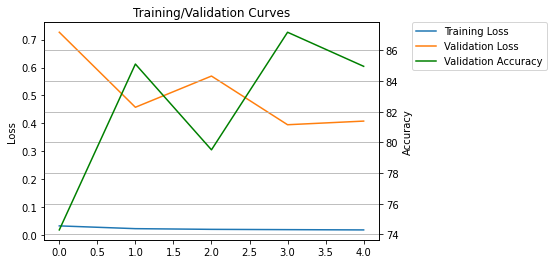

In [39]:
def plot_learning_curves(train_losses, val_losses, accuracies):
    # matplotlib.figure.Figure is the The top level container for all the plot elements.
    # https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure
    plt.figure() 
    # matplotlib.pyplot.subplots Create a figure and a set of subplots
    # return a Figure and axes.Axes 
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots
    fig, ax1 = plt.subplots()
    # matplotlib.axes.Axes.twinx Create a twin Axes sharing the xaxis
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html
    ax2 = ax1.twinx()
    
    ax1.set_ylabel("Loss")
    ax1.plot(range(len(train_losses)), train_losses, label='Training Loss')
    ax1.plot(range(len(train_losses)), val_losses, label='Validation Loss')
    ax2.plot(range(len(accuracies)), accuracies, label='Validation Accuracy', color='g')
    ax2.set_ylabel('Accuracy')
    
    # matplotlib.pyplot.title Set a title for the axes.
    # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html
    plt.title("Training/Validation Curves")
    # matplotlib.pyplot.legend Place a legend on the Axes
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
    plt.legend(loc="best")
    # matplotlib.pyplot.xlabel Set the label for the x-axis.
    # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html
    plt.xlabel("Epoch")
    
    # matplotlib.axes.Axes.get_legend_handles_labels Return handles and labels for legend
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.get_legend_handles_labels.html
    handles, labels = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    # matplotlib.pyplot.legend Place a legend on the Axes.
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
    ax2.legend(handles+handles2, labels+labels2, bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
    # matplotlib.pyplot.grid Configure the grid lines.
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
    plt.grid()
    plt.show()

# plot curves 
plot_learning_curves(train_losses, val_losses, accuracies)

In [40]:
# Test Set
model.eval()
val_loss = 0
correct = 0
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        data, target = data.to(device), target.to(device)
        output = model(data)
        val_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
        pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

val_loss /= len(val_loader.sampler.indices)
# val_losses.append(val_loss)
if val_loss < best_val:
    best_val = val_loss
    best_model = copy.deepcopy(model)
accuracy = 100. * correct / len(val_loader.sampler.indices)
# accuracies.append(accuracy)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    val_loss, correct, len(val_indices), accuracy))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



Test set: Average loss: 0.4196, Accuracy: 2302/2700 (85%)



## RBM Example

In [41]:
n_vis=256
n_hin=500
k=5

print(nn.Parameter(torch.randn(n_hin,n_vis)*1e-2).to(device))

Parameter containing:
tensor([[ 1.9513e-02, -1.7417e-02, -1.0469e-02,  ...,  6.0869e-03,
          5.3258e-03,  1.4706e-02],
        [ 6.8765e-03, -7.9062e-03, -8.2724e-03,  ..., -4.7374e-03,
          5.7022e-03, -7.9236e-05],
        [-5.8548e-04, -1.1296e-02, -5.9085e-04,  ...,  1.4544e-02,
          4.6535e-03,  1.2222e-02],
        ...,
        [ 1.7370e-02,  1.3340e-02,  1.4432e-02,  ...,  3.5841e-03,
         -3.0973e-02,  5.8662e-05],
        [ 8.9617e-03, -2.0577e-03, -8.3247e-03,  ..., -3.9282e-03,
          3.6457e-03,  1.0710e-02],
        [-1.1012e-02, -2.7949e-03,  9.0839e-03,  ..., -5.0353e-03,
          9.6633e-03,  6.2290e-04]], requires_grad=True)


In [42]:
class RBM(nn.Module):
    # v are visibles 
    # h are hiddnes
    def __init__(self,
                 n_vis=256,
                 n_hin=500,
                 k=5):
        super(RBM, self).__init__()
        # torch.nn.parameter.Parameter  is a kind of Tensor that is to be considered a module parameter.
        # Parameters are Tensor subclasses, that have a very special property when used with Module s - 
        # when they’re assigned as Module attributes they are automatically added to the list of its parameters, and will appear e.g. in parameters() iterator
        # https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html
        # TORCH.RANDN Returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1 (also called the standard normal distribution).
        # https://pytorch.org/docs/stable/generated/torch.randn.html
        # TORCH.ZEROS Returns a tensor filled with the scalar value 0, with the shape defined by the variable argument size.
        # https://pytorch.org/docs/stable/generated/torch.zeros.html
        print(f"init with {n_vis} visibles and {n_hin} hiddens")
        self.W = nn.Parameter(torch.randn(n_hin,n_vis)*1e-2).to(device)
        self.v_bias = nn.Parameter(torch.zeros(n_vis))
        self.h_bias = nn.Parameter(torch.zeros(n_hin))
        self.k = k
    
    def sample_from_p(self,p):
        # applies RELU activation function
        # TORCH.SIGN Returns a new tensor with the signs of the elements of input.
        # https://pytorch.org/docs/stable/generated/torch.sign.html
        # https://en.wikipedia.org/wiki/Sign_function
        sign = torch.sign(p - torch.rand(p.size()).to(device))
        print("sign = torch.sign(p - torch.rand(p.size()).to(device))", "\nsign.shape =", sign.shape, "\ndata:\n", sign)
        relu = F.relu(sign)
        print("relu = F.relu(sign)", "\nrelu.shape =", relu.shape, "\ndata:\n", relu)

        return F.relu(torch.sign(p - torch.rand(p.size()).to(device)))
    
    def v_to_h(self,v):
        # first apply a linear transformation
        # then applies Sigmoid 
        # then call upon sample_from_p to apply RElU activation fuction
        # TORCH.SIGMOID Computes the expit (also known as the logistic sigmoid function) of the elements of input
        # https://pytorch.org/docs/stable/generated/torch.sigmoid.html
        linear = F.linear(v.to(device),self.W.to(device),self.h_bias.to(device))
        print("linear = F.linear(v.to(device),self.W.to(device),self.h_bias.to(device))", "\nlinear.shape =", linear.shape, "data:\n", linear)
        p_h = torch.sigmoid(linear)
        print("p_h = torch.sigmoid(linear)", "\np_h.shape =", p_h.shape, "\nData:\n", p_h)
        
        print("sample_from_p(p_h) called by v_to_h")
        sample_h = self.sample_from_p(p_h)
        # <sigmoid>, <RELU>
        return p_h,sample_h
    
    def h_to_v(self,h):
        # first apply a linear transformation
        # then applies Sigmoid 
        # then call upon sample_from_p to apply RElU activation fuction
        # TORCH.NN.FUNCTIONAL.LINEAR Applies a linear transformation to the incoming data: y = xA^T + b
        linear = F.linear(h.to(device),self.W.t().to(device),self.v_bias.to(device))
        print("linear = F.linear(h.to(device),self.W.t().to(device),self.v_bias.to(device))", "\nlinear.shape =", linear.shape, "data:\n", linear)
        p_v = torch.sigmoid(linear)
        print("p_v = torch.sigmoid(linear)", "\np_v.shape = ", p_v.shape, "\nData:\n", p_v)
        
        print("sample_from_p(p_v) called by h_to_v")
        sample_v = self.sample_from_p(p_v)
        # <sigmoid>, <RELU>
        return p_v,sample_v

    # forward Defines the computation performed at every call. Although the recipe for forward pass needs to be defined within this function, 
    # one should call the Module instance afterwards instead of this since the former takes care of running the registered hooks while the latter silently ignores them.
    # https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.forward    
    def forward(self,v):
        print("forward(self, v=sample_data)")

        # pre_h1  is from linear-sigmoid and h1 is from linear-sigmoid-RELU
        # <sigmoid>, <RELU>
        print("\npre_h1,h1 = v_to_h(v)")        
        pre_h1,h1 = self.v_to_h(v)
        
        h_ = h1
        print("h_ = h1")
        for _ in range(self.k):
            print("\npre_v_,v_ = h_to_v(h_)")    
            pre_v_,v_ = self.h_to_v(h_)

            print("\npre_h_,h_ = self.v_to_h(v_))")    
            pre_h_,h_ = self.v_to_h(v_)
        
        # return v, original data, and its generated features
        return v,v_
    
    def free_energy(self,v, to_print = False):
        print("free_energy")
        # TORCH.MV Performs a matrix-vector product of the matrix input and the vector vec
        # https://pytorch.org/docs/stable/generated/torch.mv.html
        vbias_term = v.mv(self.v_bias)
        wx_b = F.linear(v,self.W,self.h_bias)

        if to_print: print("v", "\nv.shape =", v.shape, "\ndata:\n", v)
        if to_print: print("self.v_bias", "\nself.v_bias.shape =", self.v_bias.shape, "\ndata:\n", self.v_bias)
        if to_print: print("vbias_term = v.mv(self.v_bias)", "\nvbias_term.shape =", vbias_term.shape, "\ndata:\n", vbias_term)
        if to_print: print("wx_b = F.linear(v,self.W,self.h_bias)", "\nwx_b.shape =", wx_b.shape, "data:\n", wx_b)

        # TORCH.EXP Returns a new tensor with the exponential of the elements of the input tensor input. y_i = e^x_i
        # https://pytorch.org/docs/stable/generated/torch.exp.html
        # TORCH.ADD Adds other to input.
        # https://pytorch.org/docs/stable/generated/torch.add.html
        # TORCH.LOG Returns a new tensor with the natural logarithm of the elements of input, y_i = log_e (x_i)
        # https://pytorch.org/docs/stable/generated/torch.log.html
        # sum() sums up the numbers in the list. start = 1, 1 is added to the sum of numbers in the iterable.
        # https://www.geeksforgeeks.org/sum-function-python/
        hidden_term = wx_b.exp().add(1).log().sum(1)

        if to_print: print("wx_b.exp()", "\nwx_b.exp().shape", wx_b.exp().shape, "\ndata:\n", wx_b.exp())
        if to_print: print("wx_b.exp().add(1)", "\nwx_b.exp().add(1).shape", wx_b.exp().add(1).shape, "\ndata:\n", wx_b.exp().add(1))
        if to_print: print("wx_b.exp().add(1).log()", "\nwx_b.exp().add(1).log().shape", wx_b.exp().add(1).log().shape, "\ndata:\n", wx_b.exp().add(1).log())
        if to_print: print("hidden_term = wx_b.exp().add(1).log().sum(1)", "\nhidden_term.shape", hidden_term.shape, "\ndata:\n", hidden_term)

        ## return the loss
        # TORCH.MEAN Returns the mean value of all elements in the input tensor.
        # https://pytorch.org/docs/stable/generated/torch.mean.html
        eng = (-hidden_term - vbias_term).mean()
        if to_print: print("eng = (-hidden_term - vbias_term).mean()", "\neng.shape", eng.shape, "\ndata:\n", eng)
        return (-hidden_term - vbias_term).mean()

rbm = RBM(n_vis=n_features, n_hin=128, k=1)
device = torch.device("cuda" if use_cuda else "cpu")
rbm.to(device)

# torch.nn.Module.parameters Returns an iterator over module parameters. This is typically passed to an optimizer.
# https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters
train_op = optim.Adam(rbm.parameters(), 0.001)

loss_ = []
total_loss = 0

pbar = iter(train_loader)
data, target = pbar.next()
print("data.shape before", data.shape )

# *** Variable is depreciated. also not necessary for this
# A PyTorch Variable is a wrapper around a PyTorch Tensor, and represents a node in a computational graph.
# https://www.geeksforgeeks.org/variables-and-autograd-in-pytorch/
data = Variable(data.view(-1,n_features)).to(device)
print("data.shape after", data.shape )
print("data:\n", data)

# TORCH.BERNOULLI Draws binary random numbers (0 or 1) from a Bernoulli distribution.
# https://pytorch.org/docs/stable/generated/torch.bernoulli.html
sample_data = torch.bernoulli(data)
print("sample_data = torch.bernoulli(data)", "\nsample_data.shape =", sample_data.shape, "\ndata:\n", sample_data)
    
print("\nv,v1 = rbm(sample_data)")
# <real>, <generated>
# v = sample_data
v,v1 = rbm(sample_data)
loss = rbm.free_energy(v, to_print = True) - rbm.free_energy(v1)
print("loss.shape", loss.shape )
print("loss:\n", loss)

train_op.zero_grad()
loss.backward()
train_op.step()
print('epoch [{}/{}], loss: {:.4f}'.format(1, 1, torch.mean(loss)))

init with 960 visibles and 128 hiddens


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


data.shape before torch.Size([32, 40, 24])
data.shape after torch.Size([32, 960])
data:
 tensor([[0.6413, 0.6485, 0.6708,  ..., 0.0335, 0.0445, 0.0563],
        [0.6966, 0.7755, 0.8657,  ..., 0.0000, 0.0000, 0.0000],
        [0.6076, 0.6362, 0.7567,  ..., 0.0278, 0.0357, 0.0493],
        ...,
        [0.8594, 0.9059, 0.9155,  ..., 0.0000, 0.0000, 0.0085],
        [0.8188, 0.8428, 0.8655,  ..., 0.0000, 0.0000, 0.0000],
        [0.9050, 0.9107, 0.9039,  ..., 0.0000, 0.0000, 0.0000]])
sample_data = torch.bernoulli(data) 
sample_data.shape = torch.Size([32, 960]) 
data:
 tensor([[1., 1., 1.,  ..., 0., 0., 1.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.]])

v,v1 = rbm(sample_data)
forward(self, v=sample_data)

pre_h1,h1 = v_to_h(v)
linear = F.linear(v.to(device),self.W.to(device),self.h_bias.to(device)) 
linear.shape = torch.

## Restricted Boltzmann Machine
Train an RBM to generate examples from the MNIST dataset.

Modificaiton of the example shown: https://github.com/odie2630463/Restricted-Boltzmann-Machines-in-pytorch/blob/master/RBM.ipynb

In [43]:
def show(file_name,img):
    # numpy.transpose Reverse or permute the axes of an array; returns the modified array.
    # https://numpy.org/doc/stable/reference/generated/numpy.transpose.html
    npimg = np.transpose(img.numpy(),(2,1,0))
    f = "./%s.png" % file_name
    # https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.imshow.html
    plt.imshow(npimg)
    plt.title(file_name)
    plt.show()
#     plt.imsave(f,npimg)

In [44]:
class RBM(nn.Module):
    # v are visibles 
    # h are hiddnes
    def __init__(self,
                 n_vis=256,
                 n_hin=500,
                 k=5):
        super(RBM, self).__init__()
        # torch.nn.parameter.Parameter  is a kind of Tensor that is to be considered a module parameter.
        # Parameters are Tensor subclasses, that have a very special property when used with Module s - 
        # when they’re assigned as Module attributes they are automatically added to the list of its parameters, and will appear e.g. in parameters() iterator
        # https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html
        # TORCH.RANDN Returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1 (also called the standard normal distribution).
        # https://pytorch.org/docs/stable/generated/torch.randn.html
        # TORCH.ZEROS Returns a tensor filled with the scalar value 0, with the shape defined by the variable argument size.
        # https://pytorch.org/docs/stable/generated/torch.zeros.html
        self.W = nn.Parameter(torch.randn(n_hin,n_vis)*1e-2).to(device)
        self.v_bias = nn.Parameter(torch.zeros(n_vis))
        self.h_bias = nn.Parameter(torch.zeros(n_hin))
        self.k = k
    
    def sample_from_p(self,p):
        # applies RELU activation function
        # TORCH.SIGN Returns a new tensor with the signs of the elements of input.
        # https://pytorch.org/docs/stable/generated/torch.sign.html
        # https://en.wikipedia.org/wiki/Sign_function
        sign = torch.sign(p - torch.rand(p.size()).to(device))
        relu = F.relu(sign)

        return F.relu(torch.sign(p - torch.rand(p.size()).to(device)))
    
    def v_to_h(self,v):
        # first apply a linear transformation
        # then applies Sigmoid 
        # then call upon sample_from_p to apply RElU activation fuction
        # TORCH.SIGMOID Computes the expit (also known as the logistic sigmoid function) of the elements of input
        # https://pytorch.org/docs/stable/generated/torch.sigmoid.html
        linear = F.linear(v.to(device),self.W.to(device),self.h_bias.to(device))
        p_h = torch.sigmoid(linear)
        
        sample_h = self.sample_from_p(p_h)
        # <sigmoid>, <RELU>
        return p_h,sample_h
    
    def h_to_v(self,h):
        # first apply a linear transformation
        # then applies Sigmoid 
        # then call upon sample_from_p to apply RElU activation fuction
        linear = F.linear(h.to(device),self.W.t().to(device),self.v_bias.to(device))
        p_v = torch.sigmoid(linear)
        
        sample_v = self.sample_from_p(p_v)
        # <sigmoid>, <RELU>
        return p_v,sample_v

    # forward Defines the computation performed at every call. Although the recipe for forward pass needs to be defined within this function, 
    # one should call the Module instance afterwards instead of this since the former takes care of running the registered hooks while the latter silently ignores them.
    # https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.forward    
    def forward(self,v):

        # pre_h1  is from linear-sigmoid and h1 is from linear-sigmoid-RELU
        # <sigmoid>, <RELU>
        pre_h1,h1 = self.v_to_h(v)
        
        h_ = h1
        for _ in range(self.k):
            pre_v_,v_ = self.h_to_v(h_)

            pre_h_,h_ = self.v_to_h(v_)
        
        # return v, original dataset,  and its RELU
        return v,v_
    
    def free_energy(self,v):
        # TORCH.MV Performs a matrix-vector product of the matrix input and the vector vec
        # https://pytorch.org/docs/stable/generated/torch.mv.html
        vbias_term = v.mv(self.v_bias)
        wx_b = F.linear(v,self.W,self.h_bias)
        # TORCH.EXP Returns a new tensor with the exponential of the elements of the input tensor input. y_i = e^x_i
        # https://pytorch.org/docs/stable/generated/torch.exp.html
        # TORCH.ADD Adds other to input.
        # https://pytorch.org/docs/stable/generated/torch.add.html
        # TORCH.LOG Returns a new tensor with the natural logarithm of the elements of input, y_i = log_e (x_i)
        # https://pytorch.org/docs/stable/generated/torch.log.html
        # sum() sums up the numbers in the list. start = 1, 1 is added to the sum of numbers in the iterable.
        # https://www.geeksforgeeks.org/sum-function-python/
        hidden_term = wx_b.exp().add(1).log().sum(1)

        ## return the loss
        # TORCH.MEAN Returns the mean value of all elements in the input tensor.
        # https://pytorch.org/docs/stable/generated/torch.mean.html
        return (-hidden_term - vbias_term).mean()


In [45]:
rbm = RBM(n_vis=n_features, n_hin=128, k=1)
device = torch.device("cuda" if use_cuda else "cpu")
rbm.to(device)

train_op = optim.Adam(rbm.parameters(), 0.001)

num_epochs = 1 #20

for epoch in range(num_epochs):
    loss_ = []
    total_loss = 0
    for _, (data,target) in enumerate(train_loader):
        # *** Variable is depreciated 
        # A PyTorch Variable is a wrapper around a PyTorch Tensor, and represents a node in a computational graph. 
        # https://www.geeksforgeeks.org/variables-and-autograd-in-pytorch/
        data = Variable(data.view(-1,n_features)).to(device)

        # TORCH.BERNOULLI Draws binary random numbers (0 or 1) from a Bernoulli distribution.
        # https://pytorch.org/docs/stable/generated/torch.bernoulli.html
        sample_data = torch.bernoulli(data)
            
        # <real>, <generated>
        # v = sample_data
        v,v1 = rbm(sample_data)
        loss = rbm.free_energy(v) - rbm.free_energy(v1)
#         total_loss += loss
        train_op.zero_grad()
        loss.backward()
        train_op.step()
    print('epoch [{}/{}], loss: {:.4f}'.format(epoch + 1, num_epochs, torch.mean(loss)))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch [1/1], loss: -2.7418


Show real and generated features that have been learned by the RBM.

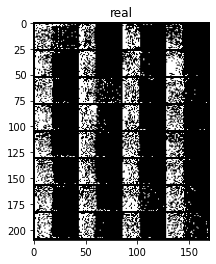

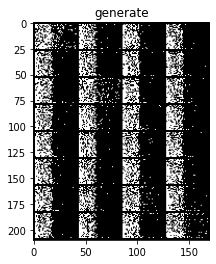

In [46]:
# v = sample_data
show("real",make_grid(v.view(32, 1, 40, 24).cpu()))
show("generate",make_grid(v1.view(32, 1, 40, 24).cpu().data))

## Example of Extract Features

In [47]:
# Extract features from our training set
batch_size = train_loader.batch_size
output_size = 128
input_size = n_features

train_features = np.zeros((len(train_loader)*batch_size, output_size))
train_labels = np.zeros(len(train_loader)*batch_size)
test_features = np.zeros((len(test_loader)*batch_size, output_size))
test_labels = np.zeros(len(test_loader)*batch_size)

print("len(train_loader) =", len(train_loader))
print("train_features.shape =", train_features.shape)
print("train_labels.shape =", train_labels.shape)
print("test_features.shape =", test_features.shape)
print("test_labels.shape =", test_labels.shape)

i = 10
pbar = iter(train_loader)
batch, labels = pbar.next()

print("\nbatch.shape before =", batch.shape)
batch = Variable(batch.view(-1,input_size))  # flatten input data
print("batch = Variable(batch.view(-1,input_size))", "\nbatch.shape", batch.shape, "\ndata:\n", batch)
print("\nrbm.v_to_h(batch)[0].cpu().data.numpy()", "\nshape=", rbm.v_to_h(batch)[0].cpu().data.numpy().shape, "\ndata:\n", rbm.v_to_h(batch)[0].cpu().data.numpy())

train_features[i*batch_size:i*batch_size+len(batch)] = rbm.v_to_h(batch)[0].cpu().data.numpy() # rbm.v_to_h()[0] is the sigmoid output
train_labels[i*batch_size:(i+1)*batch_size] = labels.numpy()

print("\ntrain_features[i*batch_size:i*batch_size+len(batch)] = rbm.v_to_h(batch)[0].cpu().data.numpy()", 
      f"\ntrain_features[{i}*{batch_size}:{i}*{batch_size}+{len(batch)}]",
      f"\ntrain_features[{i*batch_size}:{i*batch_size+len(batch)}]")
print("\ntrain_labels[i*batch_size:(i+1)*batch_size] = labels.numpy()", 
      f"\ntrain_labels[{i}*{batch_size}:({i}+1)*{batch_size}]",
      f"\ntrain_labels[{i*batch_size}:{(i+1)*batch_size}]")

pbar = iter(test_loader)
batch, labels = pbar.next()
batch = Variable(batch.view(-1,input_size))  # flatten input data

test_features[i*batch_size:i*batch_size+len(batch)] = rbm.v_to_h(batch)[0].cpu().data.numpy() # rbm.v_to_h()[0] is the sigmoid output
test_labels[i*batch_size:i*batch_size+len(batch)] = labels.numpy()
print("\ntest_features[i*batch_size:i*batch_size+len(batch)] = rbm.v_to_h(batch)[0].cpu().data.numpy()", 
      f"\ntest_features[{i}*{batch_size}:{i}*{batch_size}+{len(batch)}]",
      f"\ntest_features[{i*batch_size}:{i*batch_size+len(batch)}]")
print("\ntest_labels[i*batch_size:i*batch_size+len(batch)] = labels.numpy()", 
      f"\ntest_labels[{i}*{batch_size}:{i}*{batch_size}+{len(batch)}]",
      f"\ntest_labels[{i*batch_size}:{i*batch_size+len(batch)}]")


len(train_loader) = 675
train_features.shape = (21600, 128)
train_labels.shape = (21600,)
test_features.shape = (2720, 128)
test_labels.shape = (2720,)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



batch.shape before = torch.Size([32, 40, 24])
batch = Variable(batch.view(-1,input_size)) 
batch.shape torch.Size([32, 960]) 
data:
 tensor([[0.8857, 0.8833, 0.8960,  ..., 0.0000, 0.0000, 0.1530],
        [0.8823, 0.8870, 0.8978,  ..., 0.0000, 0.0000, 0.0000],
        [0.8649, 0.8761, 0.8995,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.4947, 0.5161, 0.5368,  ..., 0.0000, 0.0147, 0.1707],
        [0.8516, 0.9136, 0.9607,  ..., 0.0710, 0.0670, 0.0755],
        [0.8097, 0.8473, 0.8745,  ..., 0.0000, 0.0000, 0.0000]])

rbm.v_to_h(batch)[0].cpu().data.numpy() 
shape= (32, 128) 
data:
 [[0.576817   0.17147532 0.99968386 ... 0.7560982  0.31250077 0.9996611 ]
 [0.74469763 0.4708588  0.99911255 ... 0.75489956 0.55645347 0.9988859 ]
 [0.69685835 0.3948895  0.9988392  ... 0.75887233 0.50507146 0.99873596]
 ...
 [0.42104718 0.5203038  0.99835926 ... 0.58919954 0.4171661  0.9980823 ]
 [0.15675792 0.03846399 0.9896373  ... 0.13798685 0.05251827 0.98666734]
 [0.7533308  0.53573745 0.99875

## Extract Features From Training for use in Logistic Classification and Evaluate via Confusion Matrix

In [48]:
# Extract features from our training set
batch_size = train_loader.batch_size
output_size = 128
input_size = n_features

train_features = np.zeros((len(train_loader)*batch_size, output_size))
train_labels = np.zeros(len(train_loader)*batch_size)
test_features = np.zeros((len(test_loader)*batch_size, output_size))
test_labels = np.zeros(len(test_loader)*batch_size)

for i, (batch,labels) in enumerate(train_loader):
    batch = Variable(batch.view(-1,input_size))  # flatten input data

#     train_features[i*batch_size:i*batch_size+len(batch)] = rbm_2.v_to_h(rbm_1.v_to_h(batch)[0])[0].cpu().data.numpy()
    train_features[i*batch_size:i*batch_size+len(batch)] = rbm.v_to_h(batch)[0].cpu().data.numpy() # rbm.v_to_h()[0] is the sigmoid output
#     train_features[i*batch_size:i*batch_size+len(batch)] = model(batch)[0].cpu().data.numpy()
    train_labels[i*batch_size:(i+1)*batch_size] = labels.numpy()

for i, (batch, labels) in enumerate(test_loader):
    batch = Variable(batch.view(-1,input_size))  # flatten input data

#     test_features[i*batch_size:i*batch_size+len(batch)] = rbm_2.v_to_h(rbm_1.v_to_h(batch)[0])[0].cpu().data.numpy()
    test_features[i*batch_size:i*batch_size+len(batch)] = rbm.v_to_h(batch)[0].cpu().data.numpy() # rbm.v_to_h()[0] is the sigmoid output
#     test_features[i*batch_size:i*batch_size+len(batch)] = model(batch)[0].cpu().data.numpy()
    test_labels[i*batch_size:i*batch_size+len(batch)] = labels.numpy()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [50]:
# Train a Logistic Regression classifier on the extracted features
clf = LogisticRegression()
clf.fit(train_features, train_labels)
predictions = clf.predict(test_features)

print("predictions\n", predictions)
print("predictions.shape", predictions.shape)
print("test_labels\n", test_labels)
print("test_labels.shape", test_labels.shape)
print("predictions == test_labels\n", predictions == test_labels)
print('Result: %d/%d = %.2f\n' % (sum(predictions == test_labels), test_labels.shape[0], sum(predictions == test_labels)/test_labels.shape[0]))

predictions
 [4. 2. 4. ... 7. 7. 7.]
predictions.shape (2720,)
test_labels
 [4. 3. 0. ... 0. 0. 0.]
test_labels.shape (2720,)
predictions == test_labels
 [ True False False ... False False False]
Result: 1024/2720 = 0.38



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # cm is a numpy array
    if normalize:
        # numpy.newaxis is a A convenient alias for None, useful for indexing arrays.
        # is used to increase the dimension of the existing array by one more dimension, when used once
        # https://numpy.org/devdocs/reference/constants.html#numpy.newaxis
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # fmt for format(). f for Displays fixed point number and d	for Decimal integer
    # https://www.programiz.com/python-programming/methods/string/format#numbers
    fmt = '.2f' if normalize else 'd'
    # the treshhold is the max value from the confusion matrix divided by 2 
    thresh = cm.max() / 2.
    # itertools.product() is used to find the cartesian product from the given iterator, output is lexicographic ordered. 
    # https://www.geeksforgeeks.org/python-itertools-product/
    for i, j in itertools.product( range(cm.shape[0]), range(cm.shape[1]) ): #cm.shape[n] grab the index's value from shape which return a tuple
        # matplotlib.pyplot.text Add text to the Axes.
        # the third parameter, s, is the text. 
        # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
        # format() method returns a formatted representation of the given value controlled by the format specifier. 
        # https://www.programiz.com/python-programming/methods/built-in/format 
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # matplotlib.pyplot.tight_layout Adjust the padding between and around subplots.
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [52]:
# Compute confusion matrix
# sklearn.metrics.confusion_matrix Compute confusion matrix to evaluate the accuracy of a classification.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
cnf_matrix = sklearn.metrics.confusion_matrix(predictions, test_labels)
# numpy.set_printoptions Set printing options. These options determine the way floating point numbers, arrays and other NumPy objects are displayed.
# https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 62   4  22  24  11   5  26  23  14   1]
 [ 14 130   2   4  30  20   0   3   0  44]
 [ 39   6 142  54   2   3  42  32  54   8]
 [  0   2   3   5   3   0   3   4   0   4]
 [ 20  34  22  31 170  38   1  31   1  24]
 [ 14  38   3   8  20 118   2  25   3  45]
 [ 64   2  37  42  16  12  93  72  30   1]
 [ 31   6  10  17  10  24  16  60  11  27]
 [ 21   0  18  45   2   1  60   9 130   0]
 [ 32  22  14  37  13  60  15  31  22 114]]
Normalized confusion matrix
[[0.32 0.02 0.11 0.12 0.06 0.03 0.14 0.12 0.07 0.01]
 [0.06 0.53 0.01 0.02 0.12 0.08 0.   0.01 0.   0.18]
 [0.1  0.02 0.37 0.14 0.01 0.01 0.11 0.08 0.14 0.02]
 [0.   0.08 0.12 0.21 0.12 0.   0.12 0.17 0.   0.17]
 [0.05 0.09 0.06 0.08 0.46 0.1  0.   0.08 0.   0.06]
 [0.05 0.14 0.01 0.03 0.07 0.43 0.01 0.09 0.01 0.16]
 [0.17 0.01 0.1  0.11 0.04 0.03 0.25 0.2  0.08 0.  ]
 [0.15 0.03 0.05 0.08 0.05 0.11 0.08 0.28 0.05 0.13]
 [0.07 0.   0.06 0.16 0.01 0.   0.21 0.03 0.45 0.  ]
 [0.09 0.06 0.04 0.1  0.

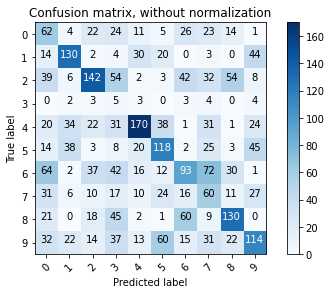

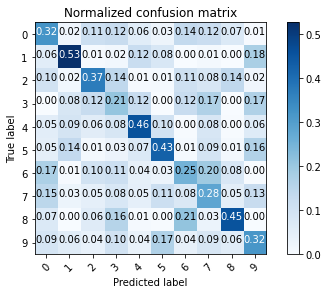

In [53]:
# Display confusion matrix
plt.figure()
class_names = [0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#  Autoencoder
Train an autoencoder to learn a compressed representation of the spoken digits.

Modification of example shown: https://github.com/SherlockLiao/pytorch-beginner/tree/master/08-AutoEncoder

In [54]:
# PyTorch model definition 
class autoencoder(nn.Module):
    def __init__(self, input_size):
        super(autoencoder, self).__init__()
        self.input_size = input_size
        
        # e for encoder and d for decoder
        self.e_fc1 = nn.Linear(self.input_size, 512)        
        self.e_fc2 = nn.Linear(512, 128)
        self.e_fc3 = nn.Linear(128, 64)
        self.e_fc4 = nn.Linear(64,64)
        
        self.d_fc1 = nn.Linear(64, 64)
        self.d_fc2 = nn.Linear(64, 128)
        self.d_fc3 = nn.Linear(128, 512)
        self.d_fc4 = nn.Linear(512, self.input_size)
    
    def forward(self, x):
        # Encoder
        h = F.relu(self.e_fc1(x))
        h = F.relu(self.e_fc2(h))
        h = F.relu(self.e_fc3(h))
        h = self.e_fc4(h)
        
        # Decoder
        h = F.relu(self.d_fc1(h))
        h = F.relu(self.d_fc2(h))
        h = F.relu(self.d_fc3(h))
        h = self.d_fc4(h)
        out = torch.tanh(h)

        return out

In [57]:
# Convert tensor to image
def to_img(x, epoch):
    x = 0.5 * (x + 1)
    if epoch == 0: print("x before", "\nx.shape =", x.shape, "\ndata:", x)
    
    # TORCH.CLAMP Clamps all elements in input into the range [ min, max ].
    # https://pytorch.org/docs/stable/generated/torch.clamp.html
    x = x.clamp(0, 1)     
    if epoch == 0: print("\nx = x.clamp(0, 1)", "\nx.shape =", x.shape, "\ndata:", x)
    
    x = x.view(x.size(0), 1, 40, 24)
    if epoch == 0: print("\nx = x.view(x.size(0), 1, 40, 24)", "\nx.shape =", x.shape, "\ndata:", x)
    
    return x

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch [1/5], loss:0.0049
x before 
x.shape = torch.Size([32, 960]) 
data: tensor([[0.8228, 0.8601, 0.8899,  ..., 0.4993, 0.4936, 0.4999],
        [0.7874, 0.8176, 0.8415,  ..., 0.5031, 0.4940, 0.5082],
        [0.7735, 0.7891, 0.7921,  ..., 0.5211, 0.5140, 0.5322],
        ...,
        [0.8407, 0.8607, 0.8729,  ..., 0.5270, 0.5189, 0.5284],
        [0.7025, 0.7167, 0.7255,  ..., 0.5037, 0.4947, 0.5177],
        [0.7471, 0.7784, 0.8005,  ..., 0.5000, 0.4977, 0.4914]])

x = x.clamp(0, 1) 
x.shape = torch.Size([32, 960]) 
data: tensor([[0.8228, 0.8601, 0.8899,  ..., 0.4993, 0.4936, 0.4999],
        [0.7874, 0.8176, 0.8415,  ..., 0.5031, 0.4940, 0.5082],
        [0.7735, 0.7891, 0.7921,  ..., 0.5211, 0.5140, 0.5322],
        ...,
        [0.8407, 0.8607, 0.8729,  ..., 0.5270, 0.5189, 0.5284],
        [0.7025, 0.7167, 0.7255,  ..., 0.5037, 0.4947, 0.5177],
        [0.7471, 0.7784, 0.8005,  ..., 0.5000, 0.4977, 0.4914]])

x = x.view(x.size(0), 1, 40, 24) 
x.shape = torch.Size([32, 1, 40, 24]

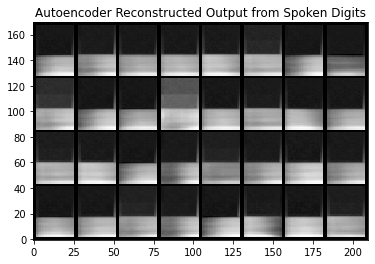

In [58]:
num_epochs = 5 #20
batch_size = 128
learning_rate = 0.001

model = autoencoder(n_features)
device = torch.device("cuda" if use_cuda else "cpu")
model.to(device)
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)
save_dir = './autoencoder_imgs/'
os.makedirs(save_dir, exist_ok=True)


for epoch in range(num_epochs):
    for data, target in train_loader:
        # Get samples
        input = data.view(-1,n_features).to(device)  # We will reuse the formatted input as our target
        
        # Forward Propagation
        output = model(input)

        # Error Computation
        # TORCH.NN.FUNCTIONAL.MSE_LOSS Measures the element-wise mean squared error. Creates a criterion that measures the mean squared error (squared L2 norm) between each element in the input xx and target yy.
        # https://pytorch.org/docs/stable/generated/torch.nn.functional.mse_loss.html
        # https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss
        loss = F.mse_loss(output, input)

        # Clear gradients
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Parameter Update
        optimizer.step()

    print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, loss))

    if epoch % 10 == 0:
        pic = to_img(output.cpu().data, epoch)
        # torchvision.utils.make_grid makes a grid of images
        # https://pytorch.org/vision/stable/generated/torchvision.utils.make_grid.html
        grid_img = torchvision.utils.make_grid(pic, normalize=True)
        imshow(grid_img, title='Autoencoder Reconstructed Output from Spoken Digits')
        # torchvision.utils.save_image Save a given Tensor into an image file.
        # https://pytorch.org/vision/main/generated/torchvision.utils.save_image.html
        save_image(pic, os.path.join(save_dir, 'image_{}.png'.format(epoch)))